# Diabetic Dataset Analysis
## Final Term Project Report
**Course:** Data Science Fundamentals  
**MID Term Project:** ***Data Analysis & Visualization with Python of US 130 Hospitals Diabetic Dataset***  
***Submitted by:***  
Muhammzad Hamza (FA23-BSE-111)  
Muhammzad Sami (FA23-BSE-132)  
Syed Muhammad Dawood Bukhari (FA23-BSE-178)  
**Instructor:** Sir Usman Shehzaib  


---

In [1]:
#importing libraries for datapreprocessing and visualizations 
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import zscore
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# loading dataset from csv
df = pd.read_csv('diabetic_data.csv')

#  DATA PREPROCESSING AND VISUALIZATION

## 1 Data Preprocessing

### 1.1 Viewing first 15 recors of dataframe

In [2]:
#viewing first records of data frame
df.head(10)

encounter_id  patient_nbr             race  gender       age weight  \
0       2278392      8222157        Caucasian  Female    [0-10)      ?   
1        149190     55629189        Caucasian  Female   [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female   [20-30)      ?   
3        500364     82442376        Caucasian    Male   [30-40)      ?   
4         16680     42519267        Caucasian    Male   [40-50)      ?   
5         35754     82637451        Caucasian    Male   [50-60)      ?   
6         55842     84259809        Caucasian    Male   [60-70)      ?   
7         63768    114882984        Caucasian    Male   [70-80)      ?   
8         12522     48330783        Caucasian  Female   [80-90)      ?   
9         15738     63555939        Caucasian  Female  [90-100)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   
5                  2                         1                    2   
6                  3                         1                    2   
7                  1                         1                    7   
8                  2                         1                    4   
9                  3                         3                    4   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No   
1                 3  ...          No      Up                   No   
2                 2  ...          No      No                   No   
3                 2  ...          No      Up                   No   
4                 1  ...          No  Steady                   No   
5                 3  ...          No  Steady                   No   
6                 4  ...          No  Steady                   No   
7                 5  ...          No      No                   No   
8                13  ...          No  Steady                   No   
9                12  ...          No  Steady                   No   

   glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
0                   No                        No                       No   
1                   No                        No                       No   
2                   No                        No                       No   
3                   No                        No                       No   
4                   No                        No                       No   
5                   No                        No                       No   
6                   No                        No                       No   
7                   No                        No                       No   
8                   No                        No                       No   
9                   No                        No                       No   

   metformin-pioglitazone  change diabetesMed readmitted  
0                      No      No          No         NO  
1                      No      Ch         Yes        >30  
2                      No      No         Yes         NO  
3                      No      Ch         Yes         NO  
4                      No      Ch         Yes         NO  
5                      No      No         Yes        >30  
6                      No      Ch         Yes         NO  
7                      No      No         Yes        >30  
8                      No      Ch         Yes         NO  
9                      No      Ch         Yes         NO  

[10 rows x 50 columns]

### 1.2 Viewing shape of dataframe

In [3]:
# shape of dataframe
df.shape

(101766, 50)

### 1.3 Viewing summary statistics of dataframe

In [4]:
df.describe()

encounter_id   patient_nbr  admission_type_id  \
count  1.017660e+05  1.017660e+05      101766.000000   
mean   1.652016e+08  5.433040e+07           2.024006   
std    1.026403e+08  3.869636e+07           1.445403   
min    1.252200e+04  1.350000e+02           1.000000   
25%    8.496119e+07  2.341322e+07           1.000000   
50%    1.523890e+08  4.550514e+07           1.000000   
75%    2.302709e+08  8.754595e+07           3.000000   
max    4.438672e+08  1.895026e+08           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count             101766.000000        101766.000000     101766.000000   
mean                   3.715642             5.754437          4.395987   
std                    5.280166             4.064081          2.985108   
min                    1.000000             1.000000          1.000000   
25%                    1.000000             1.000000          2.000000   
50%                    1.000000             7.000000          4.000000   
75%                    4.000000             7.000000          6.000000   
max                   28.000000            25.000000         14.000000   

       num_lab_procedures  num_procedures  num_medications  number_outpatient  \
count       101766.000000   101766.000000    101766.000000      101766.000000   
mean            43.095641        1.339730        16.021844           0.369357   
std             19.674362        1.705807         8.127566           1.267265   
min              1.000000        0.000000         1.000000           0.000000   
25%             31.000000        0.000000        10.000000           0.000000   
50%             44.000000        1.000000        15.000000           0.000000   
75%             57.000000        2.000000        20.000000           0.000000   
max            132.000000        6.000000        81.000000          42.000000   

       number_emergency  number_inpatient  number_diagnoses  
count     101766.000000     101766.000000     101766.000000  
mean           0.197836          0.635566          7.422607  
std            0.930472          1.262863          1.933600  
min            0.000000          0.000000          1.000000  
25%            0.000000          0.000000          6.000000  
50%            0.000000          0.000000          8.000000  
75%            0.000000          1.000000          9.000000  
max           76.000000         21.000000         16.000000

### 1.4 Checking for `missing values` in the dataset

In [5]:
df.isnull().sum().sort_values(ascending=False)

max_glu_serum               96420
A1Cresult                   84748
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
encounter_id                    0
patient_nbr                     0
number_inpatient                0
number_emergency                0
diag_1                          0
diag_2                          0
number_diagnoses                0
diag_3                          0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

### 1.5 Droping highly missing values columns and non-necessary columns 

In [6]:
df.drop(["encounter_id","patient_nbr","weight","payer_code"],axis=1,inplace=True)
df.columns.tolist()

['race',
 'gender',
 'age',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted']

### 1.6 Viewing columns in the dataframe

In [7]:
# columns in the dataframe
print(df.columns.tolist())

['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']


In [8]:
import pandas as pd
import numpy as np

# Reload the dataset
df = pd.read_csv('diabetic_data.csv')

print("="*80)
print("ANALYZING DIAGNOSIS CODES IN diag_1, diag_2, diag_3")
print("="*80)

# Function to categorize ICD-9 codes based on the ranges provided
def categorize_diagnosis(code):
    """
    Categorize ICD-9 diagnosis codes into disease categories
    Based on the ranges from the research paper
    """
    try:
        code_str = str(code).strip()
        
        # Handle special codes
        if code_str.startswith('E') or code_str.startswith('V'):
            return 'External/Supplementary'
        
        # Convert to float for range checking
        try:
            code_num = float(code_str)
        except:
            return 'Other/Invalid'
        
        # Categorize based on ICD-9 ranges
        if 250 <= code_num < 251:
            return 'Diabetes'
        elif 390 <= code_num < 460 or code_num == 785:
            return 'Circulatory'
        elif 460 <= code_num < 520 or code_num == 786:
            return 'Respiratory'
        elif 520 <= code_num < 580 or code_num == 787:
            return 'Digestive'
        elif 800 <= code_num < 1000:
            return 'Injury'
        elif 710 <= code_num < 740:
            return 'Musculoskeletal'
        elif 580 <= code_num < 630 or code_num == 788:
            return 'Genitourinary'
        elif 140 <= code_num < 240:
            return 'Neoplasms'
        elif code_num in [780, 781, 784] or 790 <= code_num < 800:
            return 'Other_Symptoms'
        elif (240 <= code_num < 280 and not (250 <= code_num < 251)):
            return 'Endocrine_NonDiabetes'
        elif 680 <= code_num < 710 or code_num == 782:
            return 'Skin'
        elif 1 <= code_num < 140:
            return 'Infectious'
        elif 290 <= code_num < 320:
            return 'Mental'
        elif 280 <= code_num < 290:
            return 'Blood'
        elif 320 <= code_num < 360:
            return 'Nervous_System'
        elif 630 <= code_num < 680:
            return 'Pregnancy'
        elif 360 <= code_num < 390:
            return 'Sense_Organs'
        elif 740 <= code_num < 760:
            return 'Congenital'
        else:
            return 'Other'
    except:
        return 'Other/Invalid'

# Apply categorization to all three diagnosis columns
print("\n📊 Categorizing diagnosis codes...")
df['diag_1_category'] = df['diag_1'].apply(categorize_diagnosis)
df['diag_2_category'] = df['diag_2'].apply(categorize_diagnosis)
df['diag_3_category'] = df['diag_3'].apply(categorize_diagnosis)

# Analysis of Primary Diagnosis (diag_1)
print("\n" + "="*80)
print("PRIMARY DIAGNOSIS (diag_1) CATEGORIES")
print("="*80)

diag1_summary = df['diag_1_category'].value_counts().sort_values(ascending=False)
diag1_pct = (diag1_summary / len(df) * 100).round(1)

print(f"\nTotal patients: {len(df):,}\n")
for category, count in diag1_summary.items():
    pct = diag1_pct[category]
    print(f"{category:30s} {count:>8,} ({pct:>5.1f}%)")

# Analysis of Secondary Diagnosis (diag_2)
print("\n" + "="*80)
print("SECONDARY DIAGNOSIS (diag_2) CATEGORIES")
print("="*80)

diag2_summary = df['diag_2_category'].value_counts().sort_values(ascending=False)
diag2_pct = (diag2_summary / len(df) * 100).round(1)

print(f"\nTotal patients: {len(df):,}\n")
for category, count in diag2_summary.items():
    pct = diag2_pct[category]
    print(f"{category:30s} {count:>8,} ({pct:>5.1f}%)")

# Analysis of Tertiary Diagnosis (diag_3)
print("\n" + "="*80)
print("TERTIARY DIAGNOSIS (diag_3) CATEGORIES")
print("="*80)

diag3_summary = df['diag_3_category'].value_counts().sort_values(ascending=False)
diag3_pct = (diag3_summary / len(df) * 100).round(1)

print(f"\nTotal patients: {len(df):,}\n")
for category, count in diag3_summary.items():
    pct = diag3_pct[category]
    print(f"{category:30s} {count:>8,} ({pct:>5.1f}%)")

# Combined analysis across all diagnoses
print("\n" + "="*80)
print("COMBINED ANALYSIS: ALL DIAGNOSES")
print("="*80)

# Combine all diagnoses
all_diagnoses = pd.concat([
    df['diag_1_category'],
    df['diag_2_category'],
    df['diag_3_category']
])

combined_summary = all_diagnoses.value_counts().sort_values(ascending=False)
combined_pct = (combined_summary / len(all_diagnoses) * 100).round(1)

print(f"\nTotal diagnosis entries: {len(all_diagnoses):,}\n")
for category, count in combined_summary.items():
    pct = combined_pct[category]
    print(f"{category:30s} {count:>8,} ({pct:>5.1f}%)")

# Key findings
print("\n" + "="*80)
print("KEY FINDINGS")
print("="*80)

# How many patients have diabetes in any diagnosis position?
diabetes_diag1 = (df['diag_1_category'] == 'Diabetes').sum()
diabetes_diag2 = (df['diag_2_category'] == 'Diabetes').sum()
diabetes_diag3 = (df['diag_3_category'] == 'Diabetes').sum()
diabetes_any = ((df['diag_1_category'] == 'Diabetes') | 
                (df['diag_2_category'] == 'Diabetes') | 
                (df['diag_3_category'] == 'Diabetes')).sum()

print(f"\n🔍 Diabetes Diagnosis Position:")
print(f"   Primary (diag_1):     {diabetes_diag1:>8,} ({diabetes_diag1/len(df)*100:>5.1f}%)")
print(f"   Secondary (diag_2):   {diabetes_diag2:>8,} ({diabetes_diag2/len(df)*100:>5.1f}%)")
print(f"   Tertiary (diag_3):    {diabetes_diag3:>8,} ({diabetes_diag3/len(df)*100:>5.1f}%)")
print(f"   Any position:         {diabetes_any:>8,} ({diabetes_any/len(df)*100:>5.1f}%)")

# Top primary diagnosis categories
print(f"\n🔍 Top 5 Primary Diagnoses:")
for i, (category, count) in enumerate(diag1_summary.head(5).items(), 1):
    print(f"   {i}. {category:30s} {count:>8,} ({count/len(df)*100:>5.1f}%)")

# Save the categorized data
df[['diag_1', 'diag_1_category', 'diag_2', 'diag_2_category', 
    'diag_3', 'diag_3_category']].to_csv('diagnoses_categorized.csv', index=False)

print(f"\n✅ Analysis complete!")
print(f"📁 Categorized diagnoses saved to 'diagnoses_categorized.csv'")

ANALYZING DIAGNOSIS CODES IN diag_1, diag_2, diag_3

📊 Categorizing diagnosis codes...

PRIMARY DIAGNOSIS (diag_1) CATEGORIES

Total patients: 101,766

Circulatory                      30,437 ( 29.9%)
Respiratory                      14,423 ( 14.2%)
Digestive                         9,475 (  9.3%)
Diabetes                          8,757 (  8.6%)
Injury                            6,974 (  6.9%)
Genitourinary                     5,117 (  5.0%)
Musculoskeletal                   4,957 (  4.9%)
Neoplasms                         3,433 (  3.4%)
Infectious                        2,768 (  2.7%)
Endocrine_NonDiabetes             2,702 (  2.7%)
Skin                              2,614 (  2.6%)
Other_Symptoms                    2,539 (  2.5%)
Mental                            2,262 (  2.2%)
External/Supplementary            1,645 (  1.6%)
Blood                             1,103 (  1.1%)
Nervous_System                      947 (  0.9%)
Pregnancy                           687 (  0.7%)
Other          

## 2 Handling missing values

### 2.1 Handling missing values in diagnosis columns `diag 1` , `diag 2` , `diag 3`

In [9]:
# Step 1: Replace '?' with NaN (taake missing values treat ho saken)
for col in ['diag_1', 'diag_2', 'diag_3']:
    df[col] = df[col].replace('?', np.nan)

# Step 2: Fill missing values with mode of that column
for col in ['diag_1', 'diag_2', 'diag_3']:
    mode_value = df[col].mode()[0]   # sabse frequent value
    df[col] = df[col].fillna(mode_value)
    print(f"{col} column filled with mode: {mode_value}")

diag_1 column filled with mode: 428
diag_2 column filled with mode: 276
diag_3 column filled with mode: 250


### 2.2 imputing missing values in max_glu_serum

In [10]:
#imputing missing values in 'max_glu_serum' column with 'not_tested' 


df['max_glu_serum'] = df['max_glu_serum'].replace(np.nan, 'not_tested')
print(f" no of missing in {df[['max_glu_serum']].isnull().sum()}")


 no of missing in max_glu_serum    0
dtype: int64


In [11]:
df['max_glu_serum'].unique()

array(['not_tested', '>300', 'Norm', '>200'], dtype=object)

### 2.3 Imputing missing values in race column

In [12]:
#proportional imputation for 'race' column
# Step 1: Replace '?' with NaN for consistency
df['race'] = df['race'].replace('?', np.nan)

# Step 2: Calculate proportions (excluding NaN)
proportions = df['race'].value_counts(normalize=True)

# Step 3: Find how many values are missing
n_missing = df['race'].isna().sum()
print(f"Missing values in 'race': {n_missing}")

# Step 4: Create a random sample based on proportions
imputed_values = np.random.choice(
    proportions.index,           # unique race categories
    size=n_missing,              # number of missing values
    p=proportions.values         # their probabilities
)

# Step 5: Fill missing values with sampled values
df.loc[df['race'].isna(), 'race'] = imputed_values

#  Now all missing values are filled proportionally
print("Proportional mode imputation done for 'race' column.")
print(df['race'].value_counts())

# race_counts = df['race'].value_counts(dropna=False)

# print("Unique values in 'race' column with their counts:")
# print(race_counts)


Missing values in 'race': 2273
Proportional mode imputation done for 'race' column.
race
Caucasian          77827
AfricanAmerican    19648
Hispanic            2091
Other               1546
Asian                654
Name: count, dtype: int64


### 2.4 imputing missing  in A1Cresults

In [13]:
df["A1Cresult"].fillna("not tested", inplace=True)
df["A1Cresult"].unique()

C:\Users\Muhammad Sami\AppData\Local\Temp\ipykernel_14192\2181931278.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["A1Cresult"].fillna("not tested", inplace=True)


array(['not tested', '>7', '>8', 'Norm'], dtype=object)

### 2.5 imputing missing values in medical speciality


In [14]:
df['medical_specialty'] = df['medical_specialty'].replace('?', 'not_known')
print(f" no of missing in {df[['medical_specialty']].isnull().sum()}")

 no of missing in medical_specialty    0
dtype: int64


## 3. Handling outliers

### 3.1 Viewing  numerical columns

In [15]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
print(numeric_cols)


Index(['encounter_id', 'patient_nbr', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses'],
      dtype='object')


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import pandas as pd

# Define numeric columns
numeric_cols = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
                'time_in_hospital', 'num_lab_procedures', 'num_procedures',
                'num_medications', 'number_outpatient', 'number_emergency',
                'number_inpatient', 'number_diagnoses']

# Z-score computation
threshold = 2.5
z_scores = np.abs(stats.zscore(df[numeric_cols], nan_policy='omit'))
outliers = (z_scores > threshold)
outlier_counts = np.sum(outliers, axis=0)

# Outlier summary
outlier_summary = pd.DataFrame({
    'Column': numeric_cols,
    'Outlier_Count': outlier_counts,
    'Total_Rows': len(df),
    'Outlier_%': (outlier_counts / len(df) * 100).round(2)
}).sort_values(by='Outlier_Count', ascending=False)

print(" Outlier Summary (Before Dropping):")
print(outlier_summary)




 Outlier Summary (Before Dropping):
                      Column  Outlier_Count  Total_Rows  Outlier_%
1   discharge_disposition_id           7301      101766       7.17
2        admission_source_id           6956      101766       6.84
0          admission_type_id           5632      101766       5.53
5             num_procedures           4954      101766       4.87
3           time_in_hospital           3700      101766       3.64
9           number_inpatient           3638      101766       3.57
7          number_outpatient           2556      101766       2.51
6            num_medications           2270      101766       2.23
8           number_emergency           1664      101766       1.64
10          number_diagnoses           1320      101766       1.30
4         num_lab_procedures            318      101766       0.31


### 3.2 Viewing boxplots of numerical columns to identify outliers

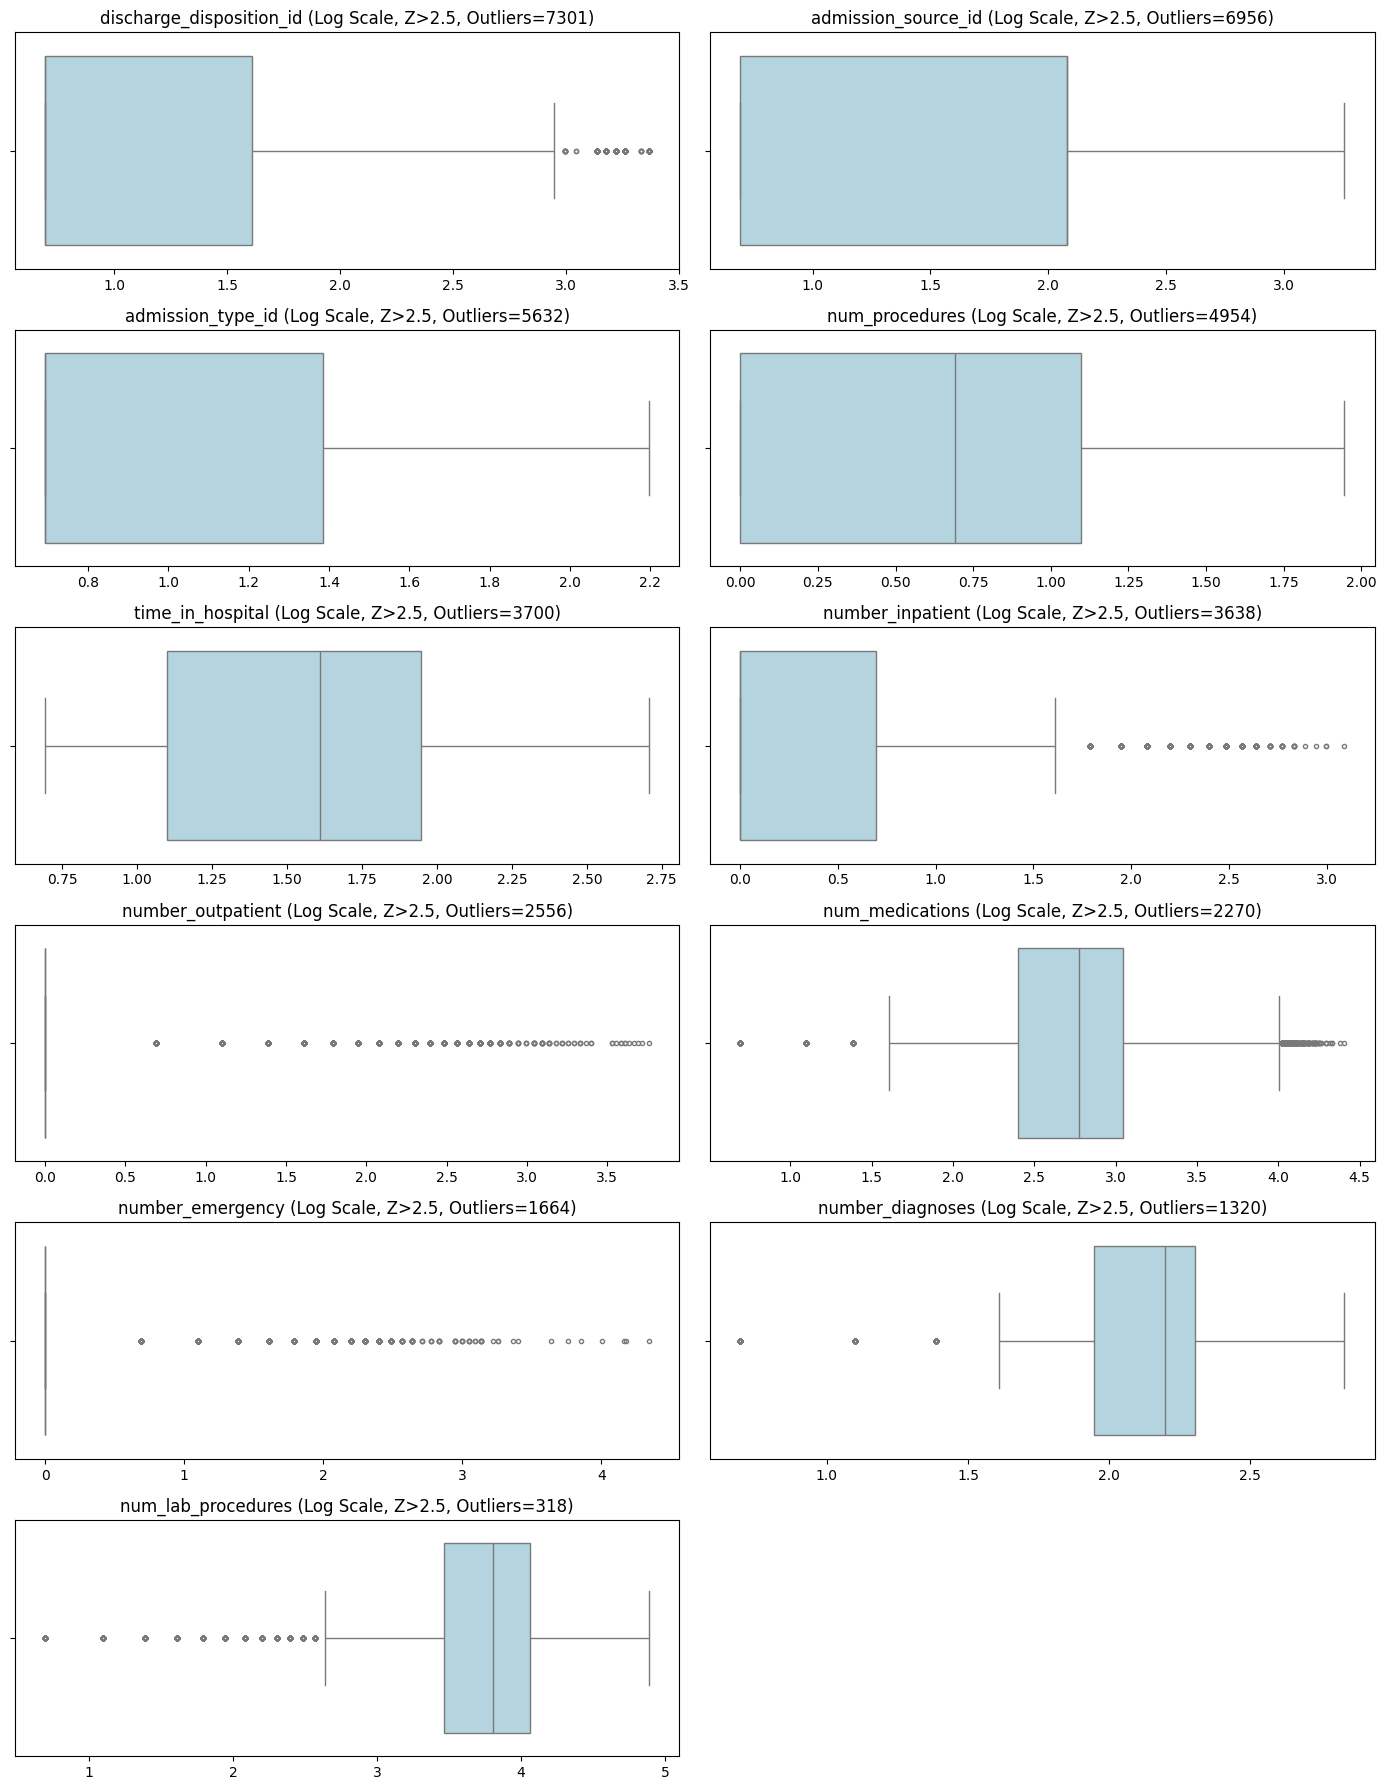

In [17]:
# Visualization
plt.figure(figsize=(14, 18))
for i, col in enumerate(outlier_summary['Column'], 1):
    plt.subplot(6, 2, i)
    sns.boxplot(x=np.log1p(df[col]), color='lightblue', fliersize=3)
    plt.title(f'{col} (Log Scale, Z>{threshold}, Outliers={int(outlier_counts[numeric_cols.index(col)])})')
    plt.xlabel('')
plt.tight_layout()
plt.show()

In [18]:
# Choose threshold
threshold = 2.5

# Calculate Z-scores only for numeric columns
z_scores = np.abs(stats.zscore(df[numeric_cols], nan_policy='omit'))

# Identify which values are outliers
outliers = (z_scores > threshold)

# Count outliers per column
outlier_counts = np.sum(outliers, axis=0)

# Convert to DataFrame for better readability
outlier_summary = pd.DataFrame({
    'Column': numeric_cols,
    'Outlier_Count': outlier_counts,
    'Total_Rows': len(df),
    'Outlier_%': (outlier_counts / len(df) * 100).round(2)
})

# Sort columns with most outliers first
outlier_summary = outlier_summary.sort_values(by='Outlier_Count', ascending=False)

print(" Outlier Summary (Before Dropping):")
print(outlier_summary)
# Remove rows with any outliers
df = df[(z_scores < threshold).all(axis=1)]
print(" After removing outliers:", df.shape)




 Outlier Summary (Before Dropping):
                      Column  Outlier_Count  Total_Rows  Outlier_%
1   discharge_disposition_id           7301      101766       7.17
2        admission_source_id           6956      101766       6.84
0          admission_type_id           5632      101766       5.53
5             num_procedures           4954      101766       4.87
3           time_in_hospital           3700      101766       3.64
9           number_inpatient           3638      101766       3.57
7          number_outpatient           2556      101766       2.51
6            num_medications           2270      101766       2.23
8           number_emergency           1664      101766       1.64
10          number_diagnoses           1320      101766       1.30
4         num_lab_procedures            318      101766       0.31
 After removing outliers: (71457, 53)


C:\Users\Muhammad Sami\AppData\Local\Temp\ipykernel_14192\4025705189.py:30: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




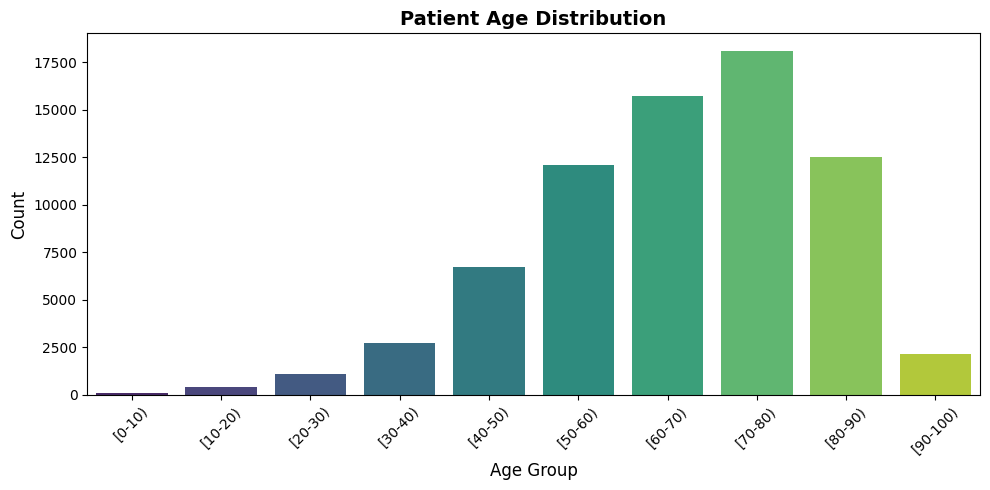

In [19]:
# histogram
import plotly.express as px
fig = px.histogram(df, x='readmitted', nbins=90, color='race', 
                   title='Readmission Distribution by Race')
fig.show()


# pie
fig = px.pie(df, names='race', 
             # pallete
            color_discrete_sequence=px.colors.sequential.RdBu,
            title='Race Distribution')
fig.show()



# Sunburst: Readmission → Race → Gender → Age
fig = px.sunburst(df, 
                  path=['readmitted', 'race', 'gender', 'age'],
                  title='Patient Demographics Flow to Readmission Status',
                  color='readmitted',
                  color_discrete_map={'0': '#2ecc71', '1': '#e74c3c'})
fig.update_traces(textinfo='label+percent parent')
fig.show()



# Age Distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='age', order=sorted(df['age'].unique()), palette='viridis')
plt.title('Patient Age Distribution', fontsize=14, weight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [20]:
age_categories = ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)']
age_mapping = {idx: label for idx, label in enumerate(age_categories)}

procedures_by_age = (
    df.groupby('age', as_index=False)['num_procedures']
      .sum()
      .assign(age_group=lambda d: d['age'].map(lambda code: age_mapping.get(code, str(code))))
      .sort_values('age')
)

fig = px.pie(
    procedures_by_age,
    names='age_group',
    values='num_procedures',
    title='Total Number of Procedures by Age Group',
    hole=0.3
)
fig.update_traces(textinfo='percent+label')
fig.show()

In [21]:
# Average time in hospital by age (bar chart)
def _age_sort_key(s):
    try:
        return int(str(s).strip('[]').split('-')[0])
    except Exception:
        return 999

age_order = sorted(df['age'].unique().tolist(), key=_age_sort_key)

avg_stay = (
    df.groupby('age', as_index=False)['time_in_hospital']
      .mean()
      .rename(columns={'time_in_hospital': 'avg_days'})
)

fig = px.bar(
    avg_stay,
    x='age',
    y='avg_days',
    category_orders={'age': age_order},
    title='Average Time in Hospital by Age Group',
    labels={'age': 'Age Group', 'avg_days': 'Average Days'}
)
fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [34]:
# --- List of categorical features ---
categorical_cols = [
    'race', 'gender', 'age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3',
    'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
    'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide',
    'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol',
    'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin',
    'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone',
    'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
    'diabetesMed'
]  # readmitted is target

chi_square_results = []

print(" Chi-Square Test Results for Association with 'readmitted'")
print("=" * 90)


for col in categorical_cols:
    # Handle missing values to avoid errors
    df[col] = df[col].fillna('missing')

    # Build contingency table (cross-tab)
    contingency_table = pd.crosstab(df[col], df['readmitted'])

    # Perform chi-square test
    chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

    # Compute Cramér's V (strength of association)
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1
    cramers_v = np.sqrt(chi2_stat / (n * min_dim))

    chi_square_results.append({
        'Feature': col,
        'Chi2_Statistic': chi2_stat,
        'P_Value': p_val,
        'Cramers_V': cramers_v,
        'Significant': 'Yes' if p_val < 0.05 else 'No'
    })

# Convert results to DataFrame
results_df = pd.DataFrame(chi_square_results).sort_values(by='P_Value')

# --- Display results ---
print(results_df.to_string(index=False))

# --- Show significant features only ---
sig = results_df[results_df['Significant'] == 'Yes']
print("\n" + "=" * 90)
print(f" Significant Features (p < 0.05): {len(sig)} out of {len(categorical_cols)}")
print("\nFeatures likely associated with readmission:")
print(sig['Feature'].tolist())


 Chi-Square Test Results for Association with 'readmitted'
                 Feature  Chi2_Statistic       P_Value  Cramers_V Significant
                  diag_1     2567.226772 2.517614e-211   0.189544         Yes
                  diag_2     2190.732845 8.623276e-151   0.175094         Yes
       medical_specialty      813.301928 1.371089e-127   0.106685         Yes
                  diag_3     2080.287365 1.021120e-124   0.170624         Yes
                 insulin      347.383636  5.497831e-75   0.069724         Yes
             diabetesMed      295.034455  3.977646e-66   0.064256         Yes
                     age      315.074496  1.649430e-62   0.066402         Yes
                  change      178.072828  1.277063e-40   0.049920         Yes
                    race       94.840469  1.232198e-19   0.036431         Yes
           max_glu_serum       74.878872  3.846514e-16   0.032371         Yes
               glipizide       46.739964  3.947666e-10   0.025575         Yes
     


 Correlation of Features with Target (readmitted):

number_inpatient            0.193153
number_diagnoses            0.121471
number_emergency            0.094395
number_outpatient           0.088364
patient_nbr                 0.070595
num_medications             0.070417
time_in_hospital            0.056730
admission_source_id         0.046403
num_lab_procedures          0.029132
admission_type_id          -0.021837
discharge_disposition_id   -0.026476
num_procedures             -0.040381
encounter_id               -0.047930

 Features to KEEP (|corr| >= 0.1):
['number_inpatient', 'number_diagnoses']

 Features to DROP (|corr| < 0.1):
['number_emergency', 'number_outpatient', 'patient_nbr', 'num_medications', 'time_in_hospital', 'admission_source_id', 'num_lab_procedures', 'admission_type_id', 'discharge_disposition_id', 'num_procedures', 'encounter_id']


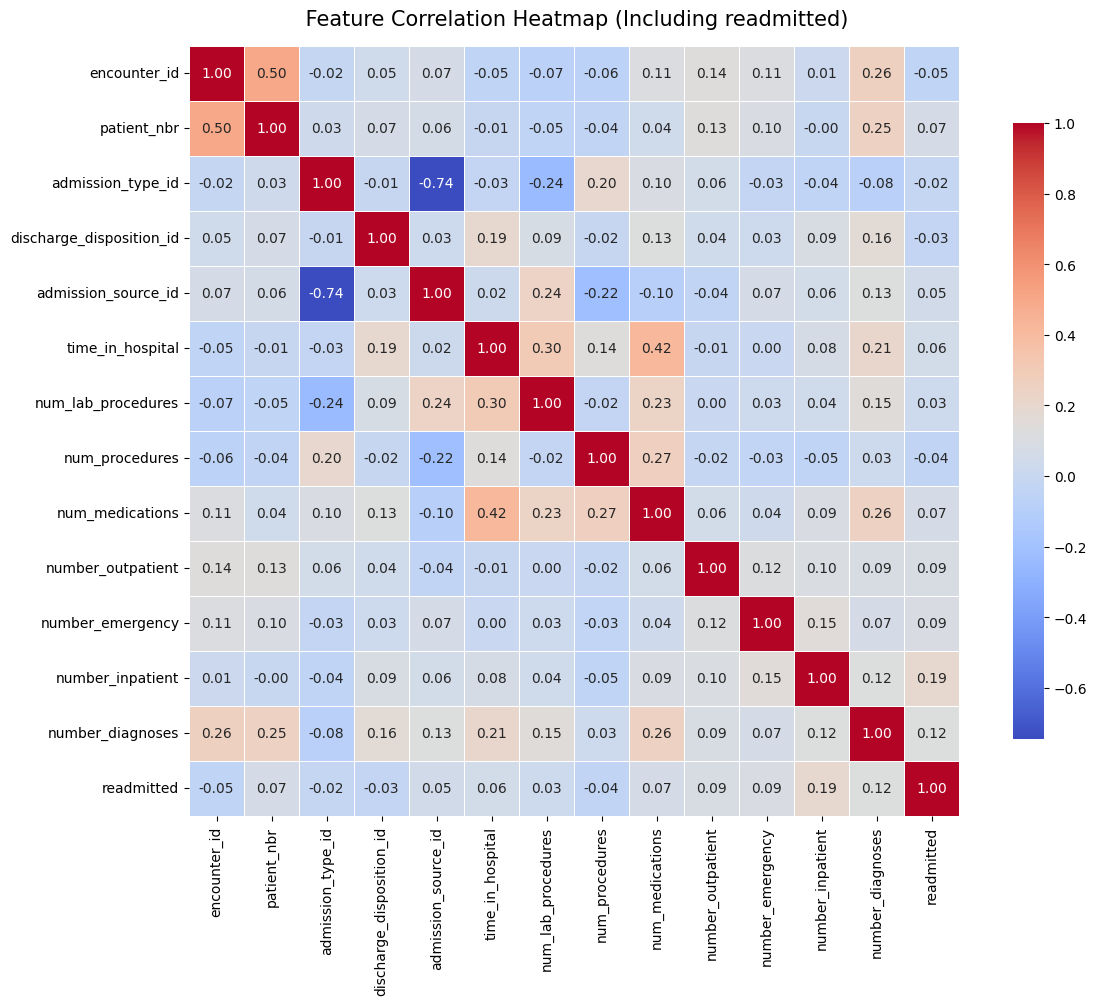


 Top 10 Features Positively Correlated with readmitted:
number_inpatient       0.193153
number_diagnoses       0.121471
number_emergency       0.094395
number_outpatient      0.088364
patient_nbr            0.070595
num_medications        0.070417
time_in_hospital       0.056730
admission_source_id    0.046403
num_lab_procedures     0.029132
admission_type_id     -0.021837
Name: readmitted, dtype: float64

 Top 10 Features Negatively Correlated with readmitted:
number_outpatient           0.088364
patient_nbr                 0.070595
num_medications             0.070417
time_in_hospital            0.056730
admission_source_id         0.046403
num_lab_procedures          0.029132
admission_type_id          -0.021837
discharge_disposition_id   -0.026476
num_procedures             -0.040381
encounter_id               -0.047930
Name: readmitted, dtype: float64

Dataset Shape: (71457, 53)
[1 0]


In [23]:
# Map readmitted to binary (admitted again or not)
df['readmitted'] = df['readmitted'].map({'NO': 0, '>30': 1, '<30': 1})

# Compute correlation matrix (numeric only)
corr = df.corr(numeric_only=True)

# ---  Step 1: Correlation with Target ---
target_corr = corr['readmitted'].drop('readmitted').sort_values(ascending=False)

# Display top correlated features
print("\n Correlation of Features with Target (readmitted):\n")
print(target_corr.to_string())

# ---  Step 2: Suggest Features Based on Threshold ---
threshold = 0.1  # Adjust as needed
strong_features = target_corr[abs(target_corr) >= threshold]
weak_features = target_corr[abs(target_corr) < threshold]

print("\n Features to KEEP (|corr| >= 0.1):")
print(strong_features.index.tolist())

print("\n Features to DROP (|corr| < 0.1):")
print(weak_features.index.tolist())

# ---  Step 3: Correlation Heatmap ---
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.8}
)

plt.title(" Feature Correlation Heatmap (Including readmitted)", fontsize=15, pad=15)
plt.show()

# ---  Step 4: Highlight Top Positive & Negative Correlations ---
top_pos = target_corr.head(10)
top_neg = target_corr.tail(10)

print("\n Top 10 Features Positively Correlated with readmitted:")
print(top_pos)

print("\n Top 10 Features Negatively Correlated with readmitted:")
print(top_neg)

print("\nDataset Shape:", df.shape)
print (df['readmitted'].unique())


In [35]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

print("="*80)
print(" SANKEY DIAGRAM: PATIENT FLOW ANALYSIS")
print("="*80)

# Check if required columns exist
required_cols = ['age', 'diabetesMed', 'change', 'readmitted']
missing = [col for col in required_cols if col not in df.columns]

if missing:
    print(f"❌ ERROR: Missing required columns: {missing}")
    print(f"Available columns: {df.columns.tolist()}")
else:
    # Create a subset for Sankey (using top categories for clarity)
    sankey_df = df[['age', 'diabetesMed', 'change', 'readmitted']].copy()
    
    print(f"✅ Data loaded: {len(sankey_df)} patients")
    print(f"   Age unique values: {sankey_df['age'].nunique()}")
    print(f"   DiabetesMed: {sankey_df['diabetesMed'].value_counts().to_dict()}")
    print(f"   Change: {sankey_df['change'].value_counts().to_dict()}")
    print(f"   Readmitted: {sankey_df['readmitted'].value_counts().to_dict()}")

    # Simplify age groups for better visualization
    def simplify_age(age):
        if age in ['[0-10)', '[10-20)', '[20-30)']:
            return 'Young (0-30)'
        elif age in ['[30-40)', '[40-50)', '[50-60)']:
            return 'Middle (30-60)'
        else:
            return 'Senior (60+)'

    sankey_df.loc[:, 'age_group'] = sankey_df['age'].apply(simplify_age)

    # Create labels - FIX: Map string values correctly!
    sankey_df.loc[:, 'readmit_label'] = sankey_df['readmitted'].map({0: 'Not Readmitted', 1: 'Readmitted'})
    sankey_df.loc[:, 'diabetesMed_label'] = sankey_df['diabetesMed'].map({'Yes': 'On Diabetes Med', 'No': 'No Diabetes Med'})
    sankey_df.loc[:, 'change_label'] = sankey_df['change'].map({'Ch': 'Med Changed', 'No': 'No Med Change'})

    # Check for any NaN values after mapping
    print(f"\n🔍 Checking for NaN after mapping:")
    print(f"   age_group NaN: {sankey_df['age_group'].isna().sum()}")
    print(f"   diabetesMed_label NaN: {sankey_df['diabetesMed_label'].isna().sum()}")
    print(f"   change_label NaN: {sankey_df['change_label'].isna().sum()}")
    print(f"   readmit_label NaN: {sankey_df['readmit_label'].isna().sum()}")

    # Sample data for performance (Sankey can be heavy with large datasets)
    sample_size = 10000
    if len(sankey_df) > sample_size:
        sankey_sample = sankey_df.sample(n=sample_size, random_state=42)
        print(f"\n📊 Using sample of {sample_size} patients for visualization")
    else:
        sankey_sample = sankey_df
        print(f"\n📊 Using all {len(sankey_sample)} patients")

    # Count flows: Age → Diabetes Med → Med Change → Readmission
    flow_counts = sankey_sample.groupby(['age_group', 'diabetesMed_label', 'change_label', 'readmit_label']).size().reset_index(name='count')
    print(f"   Total unique paths: {len(flow_counts)}")

    # Create unique node labels
    all_nodes = []
    node_dict = {}

    # Add nodes in order: Age groups → Diabetes Med → Med Change → Readmission
    for category in ['age_group', 'diabetesMed_label', 'change_label', 'readmit_label']:
        unique_vals = sankey_sample[category].unique()
        for val in unique_vals:
            if pd.notna(val) and val not in node_dict:
                node_dict[val] = len(all_nodes)
                all_nodes.append(val)

    print(f"   Total nodes: {len(all_nodes)}")
    print(f"   Nodes: {all_nodes}")

    # Create source, target, and value lists for Sankey
    sources = []
    targets = []
    values = []
    colors = []

    # Flow 1: Age Group → Diabetes Med (Elegant blue gradient)
    flow1 = sankey_sample.groupby(['age_group', 'diabetesMed_label']).size().reset_index(name='count')
    print(f"\n   Flow 1 (Age→DiabetesMed): {len(flow1)} connections")
    for _, row in flow1.iterrows():
        if row['age_group'] in node_dict and row['diabetesMed_label'] in node_dict:
            sources.append(node_dict[row['age_group']])
            targets.append(node_dict[row['diabetesMed_label']])
            values.append(row['count'])
            colors.append('rgba(99, 179, 237, 0.6)')  # Modern sky blue with better opacity

    # Flow 2: Diabetes Med → Med Change (Vibrant purple-pink gradient)
    flow2 = sankey_sample.groupby(['diabetesMed_label', 'change_label']).size().reset_index(name='count')
    print(f"   Flow 2 (DiabetesMed→Change): {len(flow2)} connections")
    for _, row in flow2.iterrows():
        if row['diabetesMed_label'] in node_dict and row['change_label'] in node_dict:
            sources.append(node_dict[row['diabetesMed_label']])
            targets.append(node_dict[row['change_label']])
            values.append(row['count'])
            colors.append('rgba(155, 89, 182, 0.6)')  # Elegant amethyst purple

    # Flow 3: Med Change → Readmission (Outcome-based gradient)
    flow3 = sankey_sample.groupby(['change_label', 'readmit_label']).size().reset_index(name='count')
    print(f"   Flow 3 (Change→Readmit): {len(flow3)} connections")
    for _, row in flow3.iterrows():
        if row['change_label'] in node_dict and row['readmit_label'] in node_dict:
            sources.append(node_dict[row['change_label']])
            targets.append(node_dict[row['readmit_label']])
            values.append(row['count'])
            # Stylish color-coding by readmission outcome
            if 'Readmitted' in str(row['readmit_label']):
                colors.append('rgba(231, 76, 60, 0.7)')  # Vibrant alizarin red
            else:
                colors.append('rgba(46, 204, 113, 0.7)')  # Fresh emerald green

    print(f"\n   Total links created: {len(sources)}")
    print(f"   Total flow value: {sum(values)}")

    # Create stylish node colors with modern palette
    node_colors = []
    for node in all_nodes:
        node_str = str(node)
        if 'Young' in node_str:
            node_colors.append('#5DADE2')  # Vibrant sky blue
        elif 'Middle' in node_str:
            node_colors.append('#58D68D')  # Fresh mint green
        elif 'Senior' in node_str:
            node_colors.append('#F7DC6F')  # Warm golden yellow
        elif 'Diabetes Med' in node_str:
            node_colors.append('#AF7AC5')  # Rich amethyst
        elif 'Med Changed' in node_str or 'No Med Change' in node_str:
            node_colors.append('#A569BD')  # Deep purple
        elif 'Readmitted' in node_str:
            node_colors.append('#EC7063')  # Soft coral red
        elif 'Not Readmitted' in node_str:
            node_colors.append('#52BE80')  # Vibrant emerald
        else:
            node_colors.append('#95A5A6')  # Modern gray

    # Create stylish Sankey diagram
    if len(sources) > 0:
        fig = go.Figure(data=[go.Sankey(
            node=dict(
                pad=20,
                thickness=25,
                line=dict(color='rgba(255, 255, 255, 0.8)', width=2),
                label=all_nodes,
                color=node_colors,
                hovertemplate='<b>%{label}</b><br>Total Flow: %{value}<extra></extra>'
            ),
            link=dict(
                source=sources,
                target=targets,
                value=values,
                color=colors,
                hovertemplate='%{source.label} → %{target.label}<br>Patients: %{value}<extra></extra>'
            )
        )])

        fig.update_layout(
            title={
                'text': "<b>🏥 Patient Journey Flow Analysis</b><br><sub>Age Group → Medication Status → Med Change → Readmission Outcome</sub>",
                'x': 0.5,
                'xanchor': 'center',
                'font': {'size': 22, 'family': 'Arial Black', 'color': '#2C3E50'}
            },
            font=dict(size=13, family='Arial', color='#34495E'),
            height=700,
            plot_bgcolor='#F8F9FA',
            paper_bgcolor='#F8F9FA',
            margin=dict(l=20, r=20, t=120, b=40),
            hoverlabel=dict(
                bgcolor='white',
                font_size=14,
                font_family='Arial'
            )
        )

        fig.show()

        print(f"\n📊 Flow Summary:")
        print(f"   Total patients in visualization: {len(sankey_sample):,}")
        print(f"   Unique paths: {len(flow_counts)}")
        print(f"   Readmission rate: {(sankey_sample['readmitted'].sum() / len(sankey_sample) * 100):.2f}%")
    else:
        print("\n❌ ERROR: No flows were created. Check your data.")

 SANKEY DIAGRAM: PATIENT FLOW ANALYSIS
✅ Data loaded: 71457 patients
   Age unique values: 10
   DiabetesMed: {'Yes': 55008, 'No': 16449}
   Change: {'No': 38860, 'Ch': 32597}
   Readmitted: {0: 39794, 1: 31663}

🔍 Checking for NaN after mapping:
   age_group NaN: 0
   diabetesMed_label NaN: 0
   change_label NaN: 0
   readmit_label NaN: 0

📊 Using sample of 10000 patients for visualization
   Total unique paths: 18
   Total nodes: 9
   Nodes: ['Senior (60+)', 'Young (0-30)', 'Middle (30-60)', 'On Diabetes Med', 'No Diabetes Med', 'Med Changed', 'No Med Change', 'Readmitted', 'Not Readmitted']

   Flow 1 (Age→DiabetesMed): 6 connections
   Flow 2 (DiabetesMed→Change): 3 connections
   Flow 3 (Change→Readmit): 4 connections

   Total links created: 13
   Total flow value: 30000



📊 Flow Summary:
   Total patients in visualization: 10,000
   Unique paths: 18
   Readmission rate: 44.00%


In [36]:
print("\n" + "="*80)
print(" SANKEY DIAGRAM #2: DIAGNOSIS TO READMISSION FLOW")
print("="*80)

# Using diagnosis categories (if available) or top diagnosis codes
# Sample for performance - Use .copy() to avoid SettingWithCopyWarning
sankey_diag = df[['diag_1_category', 'diabetesMed', 'readmitted']].copy()

print(f"✅ Data loaded: {len(sankey_diag)} patients")
print(f"   diabetesMed unique: {sankey_diag['diabetesMed'].unique()}")

# Get top 5 diagnosis categories
top_diags = sankey_diag['diag_1_category'].value_counts().head(5).index.tolist()
sankey_diag_filtered = sankey_diag[sankey_diag['diag_1_category'].isin(top_diags)].copy()  # Added .copy()

print(f"   Top 5 diagnoses: {top_diags}")
print(f"   Filtered to: {len(sankey_diag_filtered)} patients")

# Create labels using .loc to avoid warnings - FIX: Map string values correctly!
sankey_diag_filtered.loc[:, 'diabetesMed_label'] = sankey_diag_filtered['diabetesMed'].map({'Yes': 'On Diabetes Med', 'No': 'No Diabetes Med'})
sankey_diag_filtered.loc[:, 'readmit_label'] = sankey_diag_filtered['readmitted'].map({0: 'Not Readmitted', 1: 'Readmitted'})

# Check for NaN after mapping
print(f"\n🔍 Checking for NaN after mapping:")
print(f"   diabetesMed_label NaN: {sankey_diag_filtered['diabetesMed_label'].isna().sum()}")
print(f"   readmit_label NaN: {sankey_diag_filtered['readmit_label'].isna().sum()}")

# Sample if needed
if len(sankey_diag_filtered) > 8000:
    sankey_diag_filtered = sankey_diag_filtered.sample(n=8000, random_state=42)
    print(f"   Sampled to: {len(sankey_diag_filtered)} patients")

# Create node dictionary
all_nodes2 = []
node_dict2 = {}

for category in ['diag_1_category', 'diabetesMed_label', 'readmit_label']:
    unique_vals = sankey_diag_filtered[category].unique()
    for val in unique_vals:
        # Skip NaN/None values
        if pd.notna(val) and val not in node_dict2:
            node_dict2[val] = len(all_nodes2)
            all_nodes2.append(val)

print(f"\n   Total nodes: {len(all_nodes2)}")
print(f"   Nodes: {all_nodes2}")

# Create flows
sources2 = []
targets2 = []
values2 = []
colors2 = []

# Flow 1: Diagnosis → Diabetes Med (Teal gradient)
flow_d1 = sankey_diag_filtered.groupby(['diag_1_category', 'diabetesMed_label']).size().reset_index(name='count')
print(f"\n   Flow 1 (Diagnosis→DiabetesMed): {len(flow_d1)} connections")
for _, row in flow_d1.iterrows():
    # Check that both values exist in node_dict2
    if row['diag_1_category'] in node_dict2 and row['diabetesMed_label'] in node_dict2:
        sources2.append(node_dict2[row['diag_1_category']])
        targets2.append(node_dict2[row['diabetesMed_label']])
        values2.append(row['count'])
        colors2.append('rgba(72, 201, 176, 0.6)')  # Modern teal

# Flow 2: Diabetes Med → Readmission (Outcome gradient)
flow_d2 = sankey_diag_filtered.groupby(['diabetesMed_label', 'readmit_label']).size().reset_index(name='count')
print(f"   Flow 2 (DiabetesMed→Readmit): {len(flow_d2)} connections")
for _, row in flow_d2.iterrows():
    # Check that both values exist in node_dict2
    if row['diabetesMed_label'] in node_dict2 and row['readmit_label'] in node_dict2:
        sources2.append(node_dict2[row['diabetesMed_label']])
        targets2.append(node_dict2[row['readmit_label']])
        values2.append(row['count'])
        if 'Readmitted' in str(row['readmit_label']):
            colors2.append('rgba(231, 76, 60, 0.7)')  # Vibrant alizarin red
        else:
            colors2.append('rgba(46, 204, 113, 0.7)')  # Fresh emerald green

print(f"\n   Total links created: {len(sources2)}")
print(f"   Total flow value: {sum(values2)}")

# Stylish node colors with modern palette
node_colors2 = []
for node in all_nodes2:
    node_str = str(node)  # Convert to string to safely use 'in' operator
    if 'Diabetes Med' in node_str or 'On Diabetes' in node_str:
        node_colors2.append('#F39C12')  # Rich golden orange
    elif 'Readmitted' in node_str:
        node_colors2.append('#E74C3C')  # Vibrant red
    elif 'Not Readmitted' in node_str:
        node_colors2.append('#27AE60')  # Vibrant green
    else:  # Diagnosis categories
        node_colors2.append('#3498DB')  # Modern blue

# Create stylish second Sankey diagram
if len(sources2) > 0:
    fig2 = go.Figure(data=[go.Sankey(
        node=dict(
            pad=20,
            thickness=25,
            line=dict(color='rgba(255, 255, 255, 0.8)', width=2),
            label=all_nodes2,
            color=node_colors2,
            hovertemplate='<b>%{label}</b><br>Total Flow: %{value}<extra></extra>'
        ),
        link=dict(
            source=sources2,
            target=targets2,
            value=values2,
            color=colors2,
            hovertemplate='%{source.label} → %{target.label}<br>Patients: %{value}<extra></extra>'
        )
    )])

    fig2.update_layout(
        title={
            'text': "<b>🩺 Diagnosis-Based Patient Flow</b><br><sub>Primary Diagnosis → Diabetes Medication → Readmission Outcome</sub>",
            'x': 0.5,
            'xanchor': 'center',
            'font': {'size': 22, 'family': 'Arial Black', 'color': '#2C3E50'}
        },
        font=dict(size=13, family='Arial', color='#34495E'),
        height=700,
        plot_bgcolor='#F8F9FA',
        paper_bgcolor='#F8F9FA',
        margin=dict(l=20, r=20, t=120, b=40),
        hoverlabel=dict(
            bgcolor='white',
            font_size=14,
            font_family='Arial'
        )
    )

    fig2.show()

    print(f"\n📊 Diagnosis Flow Summary:")
    print(f"   Patients analyzed: {len(sankey_diag_filtered):,}")
    print(f"   Top diagnoses included: {len(top_diags)}")
    print(f"   Readmission rate: {(sankey_diag_filtered['readmitted'].sum() / len(sankey_diag_filtered) * 100):.2f}%")
else:
    print("\n❌ ERROR: No flows were created. Check your data.")


 SANKEY DIAGRAM #2: DIAGNOSIS TO READMISSION FLOW
✅ Data loaded: 71457 patients
   diabetesMed unique: ['Yes' 'No']
   Top 5 diagnoses: ['Circulatory', 'Respiratory', 'Digestive', 'Diabetes', 'Injury']
   Filtered to: 48274 patients

🔍 Checking for NaN after mapping:
   diabetesMed_label NaN: 0
   readmit_label NaN: 0
   Sampled to: 8000 patients

   Total nodes: 9
   Nodes: ['Respiratory', 'Digestive', 'Diabetes', 'Circulatory', 'Injury', 'On Diabetes Med', 'No Diabetes Med', 'Readmitted', 'Not Readmitted']

   Flow 1 (Diagnosis→DiabetesMed): 10 connections
   Flow 2 (DiabetesMed→Readmit): 4 connections

   Total links created: 14
   Total flow value: 16000



📊 Diagnosis Flow Summary:
   Patients analyzed: 8,000
   Top diagnoses included: 5
   Readmission rate: 46.23%


In [39]:
import networkx as nx
import plotly.graph_objects as go
from itertools import combinations

print("="*80)
print(" NETWORK GRAPH: DISEASE COMORBIDITY PATTERNS")
print("="*80)

# Use the three diagnosis columns
diag_cols = ['diag_1_category', 'diag_2_category', 'diag_3_category']

# Filter out 'Other/Invalid' and missing diagnoses
df_diseases = df[diag_cols].copy()

print(f"✅ Analyzing diagnoses from {len(df_diseases):,} patients")

# Count individual disease occurrences
disease_counts = {}
for col in diag_cols:
    for disease in df_diseases[col].dropna():
        if disease not in ['Other/Invalid', 'Other', 'External/Supplementary', 'Other_Symptoms']:
            disease_counts[disease] = disease_counts.get(disease, 0) + 1

# Select only TOP 10 most common diseases for clean visualization
top_diseases = dict(sorted(disease_counts.items(), key=lambda x: x[1], reverse=True)[:10])

print(f"\n📊 Focusing on Top 10 Disease Categories:")
for disease, count in list(top_diseases.items())[:10]:
    print(f"   • {disease.replace('_', ' ')}: {count:,} patients")

# Count co-occurrences ONLY for top diseases
comorbidity_counts = {}

for idx, row in df_diseases.iterrows():
    # Get only top diseases for this patient
    patient_diseases = []
    for col in diag_cols:
        disease = row[col]
        if pd.notna(disease) and disease in top_diseases:
            if disease not in patient_diseases:  # Avoid duplicates
                patient_diseases.append(disease)
    
    # Count all pairs of diseases
    if len(patient_diseases) >= 2:
        for disease1, disease2 in combinations(sorted(patient_diseases), 2):
            pair = (disease1, disease2)
            comorbidity_counts[pair] = comorbidity_counts.get(pair, 0) + 1

# Keep only STRONG comorbidities (>200 co-occurrences) for clarity
strong_comorbidities = {k: v for k, v in comorbidity_counts.items() if v > 200}

print(f"\n🔗 Strong Comorbidity Relationships: {len(strong_comorbidities)}")
print(f"\n🔍 Top 5 Disease Pairs:")
top_pairs = sorted(strong_comorbidities.items(), key=lambda x: x[1], reverse=True)[:5]
for (d1, d2), count in top_pairs:
    print(f"   • {d1} + {d2}: {count:,} patients")

# Create clean network graph
G = nx.Graph()

# Add nodes
for disease, count in top_diseases.items():
    G.add_node(disease, weight=count)

# Add edges
for (disease1, disease2), count in strong_comorbidities.items():
    G.add_edge(disease1, disease2, weight=count)

print(f"\n🕸️  Clean Network Structure:")
print(f"   Nodes: {G.number_of_nodes()}")
print(f"   Edges: {G.number_of_edges()}")

# Use better layout for clarity
pos = nx.kamada_kawai_layout(G)

# Create elegant edge traces
edge_traces = []
edge_annotations = []

for edge in G.edges(data=True):
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    weight = edge[2]['weight']
    
    # Elegant edge styling
    width = 2 + (weight / 300)
    opacity = 0.3 + (weight / 2000)
    
    edge_trace = go.Scatter(
        x=[x0, x1, None],
        y=[y0, y1, None],
        mode='lines',
        line=dict(width=width, color=f'rgba(155, 89, 182, {opacity})'),
        hoverinfo='text',
        text=f'<b>{edge[0].replace("_", " ")}</b><br>+<br><b>{edge[1].replace("_", " ")}</b><br><br>{weight:,} patients',
        showlegend=False
    )
    edge_traces.append(edge_trace)
    
    # Add edge labels for top relationships
    if weight > 400:
        mid_x, mid_y = (x0 + x1) / 2, (y0 + y1) / 2
        edge_annotations.append(
            dict(
                x=mid_x, y=mid_y,
                text=f'{weight}',
                showarrow=False,
                font=dict(size=9, color='#7D3C98', family='Arial'),
                bgcolor='rgba(255, 255, 255, 0.8)',
                borderpad=2
            )
        )

# Create stunning node trace
node_x = []
node_y = []
node_text = []
node_size = []
node_color = []
node_labels = []

for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    
    weight = G.nodes[node]['weight']
    degree = G.degree(node)
    
    # Smaller, cleaner nodes
    node_size.append(20 + (degree * 3))
    
    # Color based on comorbidity count
    node_color.append(degree)
    
    # Clean labels
    label = node.replace('_', ' ')
    if len(label) > 15:
        words = label.split()
        label = '<br>'.join([' '.join(words[i:i+2]) for i in range(0, len(words), 2)])
    node_labels.append(label)
    
    # Rich hover information
    neighbors = list(G.neighbors(node))
    node_text.append(
        f'<b>{node.replace("_", " ")}</b><br><br>'
        f'📊 Prevalence: {weight:,} patients<br>'
        f'🔗 Comorbidities: {degree}<br><br>'
        f'<i>Often occurs with:<br>{"<br>".join([n.replace("_", " ") for n in neighbors[:3]])}</i>'
    )

node_trace = go.Scatter(
    x=node_x,
    y=node_y,
    mode='markers+text',
    text=node_labels,
    textposition='bottom center',
    textfont=dict(size=10, color='#2C3E50', family='Arial', weight='bold'),
    hoverinfo='text',
    hovertext=node_text,
    marker=dict(
        size=node_size,
        color=node_color,
        colorscale='Viridis',
        showscale=True,
        colorbar=dict(
            title=dict(
                text='<b>Comorbidities</b>',
                font=dict(size=11)
            ),
            thickness=15,
            len=0.5,
            x=1.02,
            tickfont=dict(size=10)
        ),
        line=dict(width=1.5, color='white'),
        opacity=0.9
    ),
    showlegend=False
)

# Create beautiful figure
fig_network = go.Figure(data=edge_traces + [node_trace])

fig_network.update_layout(
    title={
        'text': '<b>🩺 Disease Comorbidity Network</b><br>'
                '<sub>Top 10 Most Common Conditions & Their Relationships</sub>',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 24, 'family': 'Arial Black', 'color': '#2C3E50'}
    },
    annotations=edge_annotations,
    showlegend=False,
    hovermode='closest',
    margin=dict(l=40, r=160, t=140, b=40),
    plot_bgcolor='#FDFEFE',
    paper_bgcolor='#FDFEFE',
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    height=800,
    width=1000,
    font=dict(family='Arial', size=12, color='#34495E')
)

fig_network.show()

print(f"\n📊 Network Analysis Summary:")
print(f"   Diseases displayed: {G.number_of_nodes()}")
print(f"   Strong comorbidity links: {G.number_of_edges()}")
print(f"   Most connected disease: {max(dict(G.degree()).items(), key=lambda x: x[1])[0].replace('_', ' ')}")

# Identify disease clusters
if G.number_of_nodes() > 0:
    degree_dict = dict(G.degree())
    top_central = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)[:3]
    print(f"\n🎯 Diseases with Most Comorbidities:")
    for disease, degree in top_central:
        print(f"   • {disease.replace('_', ' ')}: {degree} co-occurring conditions")

 NETWORK GRAPH: DISEASE COMORBIDITY PATTERNS
✅ Analyzing diagnoses from 71,457 patients

📊 Focusing on Top 10 Disease Categories:
   • Circulatory: 62,588 patients
   • Diabetes: 26,945 patients
   • Respiratory: 23,550 patients
   • Endocrine NonDiabetes: 14,878 patients
   • Genitourinary: 14,746 patients
   • Digestive: 12,968 patients
   • Injury: 7,637 patients
   • Skin: 6,337 patients
   • Musculoskeletal: 6,063 patients
   • Neoplasms: 5,722 patients

🔗 Strong Comorbidity Relationships: 43

🔍 Top 5 Disease Pairs:
   • Circulatory + Diabetes: 12,880 patients
   • Circulatory + Respiratory: 10,625 patients
   • Circulatory + Genitourinary: 5,816 patients
   • Diabetes + Respiratory: 5,354 patients
   • Circulatory + Endocrine_NonDiabetes: 5,093 patients

🕸️  Clean Network Structure:
   Nodes: 10
   Edges: 43



📊 Network Analysis Summary:
   Diseases displayed: 10
   Strong comorbidity links: 43
   Most connected disease: Circulatory

🎯 Diseases with Most Comorbidities:
   • Circulatory: 9 co-occurring conditions
   • Diabetes: 9 co-occurring conditions
   • Respiratory: 9 co-occurring conditions


 Model Evaluation Results
Accuracy: 0.6113

Confusion Matrix:
[[True Positive,  False Negative],
 [False Positive, True Negative]]
[[2937 3418]
 [2137 5800]]

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.73      0.68      7937
           1       0.58      0.46      0.51      6355

    accuracy                           0.61     14292
   macro avg       0.60      0.60      0.60     14292
weighted avg       0.61      0.61      0.60     14292



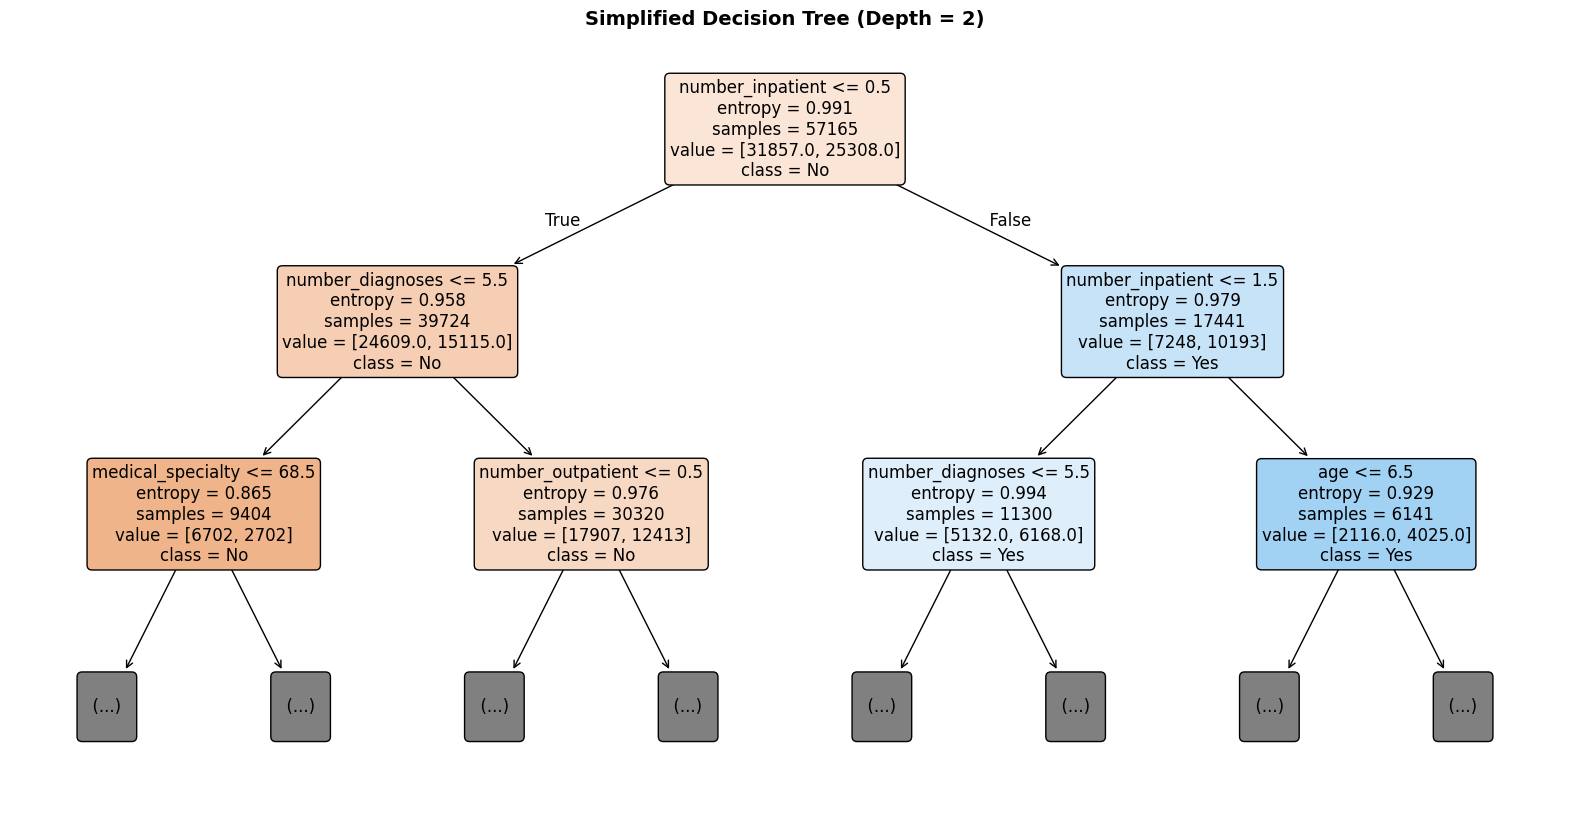

C:\Users\Muhammad Sami\AppData\Local\Temp\ipykernel_14192\3622371141.py:105: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




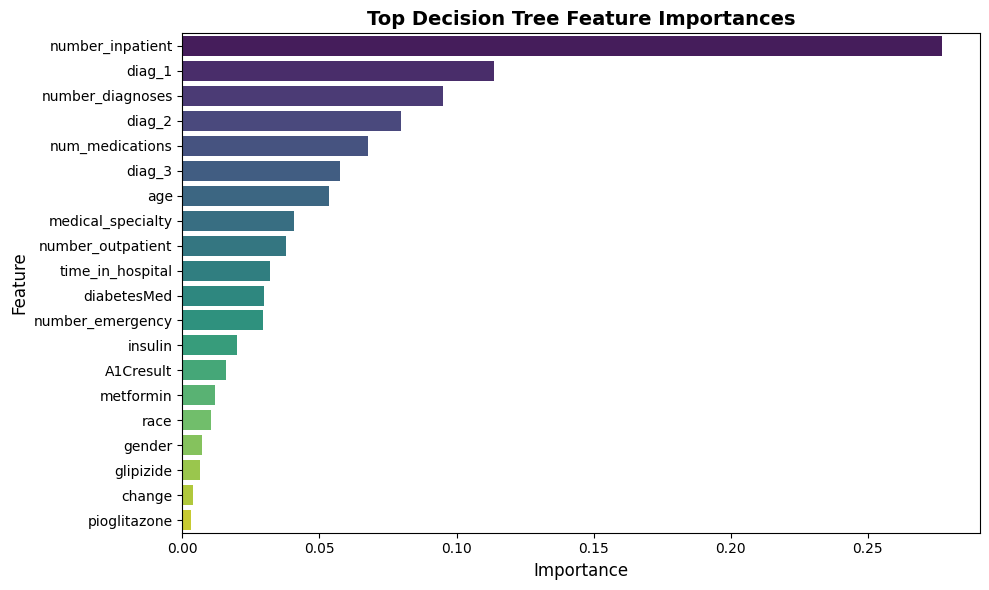

In [ ]:
# import necessary libraries
from sklearn.tree import DecisionTreeClassifier, plot_tree

# =============================================
#  Step 1: Select important features (based on chi-square and correlation)
# =============================================
selected_features = [
    'diag_1', 'diag_2', 'diag_3', 'medical_specialty',
    'insulin', 'diabetesMed', 'age', 'change', 'race',
    'max_glu_serum', 'glipizide', 'repaglinide', 'A1Cresult',
    'metformin', 'rosiglitazone', 'acarbose', 'gender', 'pioglitazone',
    'number_inpatient', 'number_diagnoses', 'number_emergency',
    'number_outpatient', 'num_medications', 'time_in_hospital'
]

# =============================================
#  Step 2: Create a copy of dataframe for encoding
# =============================================
df_encoded = df.copy()

# =============================================
#  Step 3: Label Encoding for Decision Tree (works well with tree-based models)
# =============================================
le = LabelEncoder()

for col in selected_features:
    if df_encoded[col].dtype == 'object':        # Encode only categorical columns
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

# =============================================
# Step 4: Split data into training and testing sets (for Decision Tree)
# =============================================
X_dt = df_encoded[selected_features]
y = df_encoded['readmitted']                     # Target variable (0 = No, 1 = Yes)

X_train, X_test, y_train, y_test = train_test_split(
    X_dt, y, test_size=0.2, random_state=42
)

# =============================================
#  Step 4: Train Decision Tree Classifier
# =============================================
model = DecisionTreeClassifier(
    criterion='entropy',    # Can also try 'gini'
    max_depth=10,           # Limit depth to prevent overfitting
    random_state=42
)

model.fit(X_train, y_train)

# =============================================
#  Step 5: Evaluate Model Performance
# =============================================
y_pred = model.predict(X_test)

print(" Model Evaluation Results")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))

# Flip confusion matrix to user's format: [[TP, FN], [FP, TN]]
cm_dt = confusion_matrix(y_test, y_pred)
cm_dt_flipped = cm_dt[::-1, ::-1]  # Reverse both rows and columns
print("\nConfusion Matrix:")
print("[[True Positive,  False Negative],")
print(" [False Positive, True Negative]]")
print(cm_dt_flipped)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# =============================================
# Step 6: Visualize Simplified Decision Tree (Top 6 Levels)
# =============================================
plt.figure(figsize=(20, 10))
plot_tree(
    model,
    feature_names=selected_features,
    class_names=['No', 'Yes'],
    filled=True,
    rounded=True,
    max_depth=2,       #  Show only first 2 levels
    fontsize=12
)
plt.title("Simplified Decision Tree (Depth = 2)", fontsize=14, weight='bold')
plt.show()

# =============================================
#  Step 7: Feature Importance Visualization
# =============================================
importances = model.feature_importances_

# Create DataFrame and sort by importance
imp_df = pd.DataFrame({
    'feature': selected_features,
    'importance': importances
}).sort_values('importance', ascending=False).head(20)

# Plot top 20 features
plt.figure(figsize=(10, 6))

sns.barplot(data=imp_df, x='importance', y='feature', palette='viridis')

plt.title('Top Decision Tree Feature Importances', fontsize=14, weight='bold')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

---
## 4. Other Machine Learning Algorithms

### 4.1 Naive Bayes Classifier

In [25]:
#  NAIVE BAYES CLASSIFIER

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("="*80)
print(" NAIVE BAYES CLASSIFIER - Training & Evaluation")
print("="*80)

# Naive Bayes uses the same label-encoded data (Gaussian NB works with numerical features)
# Using the same X_train, X_test from Decision Tree preparation

# Initialize Gaussian Naive Bayes
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test)

# Evaluate performance
print("\n Model Evaluation Results:")
print("-"*80)
print("Accuracy:", round(accuracy_score(y_test, y_pred_nb), 4))

# confusion matrix 
cm_nb_original = confusion_matrix(y_test, y_pred_nb)
cm_nb = cm_nb_original[::-1, ::-1]  # Reverse both rows and columns
print("\nConfusion Matrix:")
print("[[True Positive,  False Negative],")
print(" [False Positive, True Negative]]")
print(cm_nb)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb, target_names=['No Readmission', 'Readmitted']))


 NAIVE BAYES CLASSIFIER - Training & Evaluation

 Model Evaluation Results:
--------------------------------------------------------------------------------
Accuracy: 0.5965

Confusion Matrix:
[[True Positive,  False Negative],
 [False Positive, True Negative]]
[[1700 4655]
 [1112 6825]]

Classification Report:
                precision    recall  f1-score   support

No Readmission       0.59      0.86      0.70      7937
    Readmitted       0.60      0.27      0.37      6355

      accuracy                           0.60     14292
     macro avg       0.60      0.56      0.54     14292
  weighted avg       0.60      0.60      0.56     14292



  P(No Readmission) = 0.5573
  P(Readmission) = 0.4427


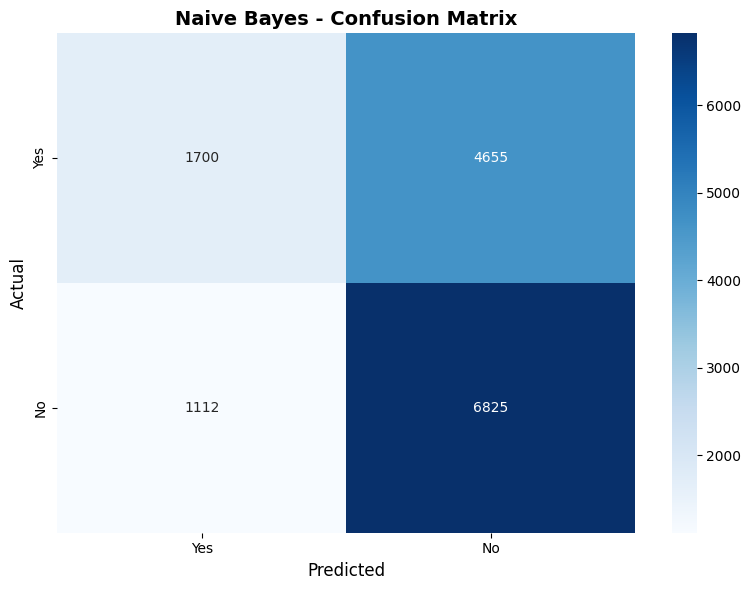

In [26]:
# Visualization - Confusion Matrix
print(f"  P(No Readmission) = {nb_model.class_prior_[0]:.4f}")
print(f"  P(Readmission) = {nb_model.class_prior_[1]:.4f}")

# Visualization - Confusion Matrix 
plt.figure(figsize=(8, 6))
# Use already flipped matrix (cm_nb) from above
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])
plt.title('Naive Bayes - Confusion Matrix', fontsize=14, weight='bold')
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.show()



### 4.2 Artificial Neural Network (Classification by Backpropagation)

In [27]:
#  ARTIFICIAL NEURAL NETWORK (Backpropagation)

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

print("="*80)
print(" ARTIFICIAL NEURAL NETWORK - Training & Evaluation")
print("="*80)

# =============================================
#  ANN: One-Hot Encoding for categorical features (better for neural networks)
# =============================================
print("\n Applying One-Hot Encoding for categorical features (suitable for ANN)...")

# Get original data before label encoding
df_ann = df.copy()

# Identify categorical columns
categorical_cols = [col for col in selected_features if df[col].dtype == 'object' or 
                   col in ['diag_1', 'diag_2', 'diag_3', 'medical_specialty', 'insulin', 
                          'diabetesMed', 'age', 'change', 'race', 'max_glu_serum', 
                          'glipizide', 'repaglinide', 'A1Cresult', 'metformin', 
                          'rosiglitazone', 'acarbose', 'gender', 'pioglitazone']]

# One-Hot Encoding for categorical features
X_ann = pd.get_dummies(df_ann[selected_features], 
                        columns=categorical_cols,
                        drop_first=True)  # Drop first to avoid multicollinearity

# Split data for ANN
X_train_ann, X_test_ann, y_train_ann, y_test_ann = train_test_split(
    X_ann, df_ann['readmitted'], test_size=0.2, random_state=42
)

print(f" Original features: {len(selected_features)}")
print(f" After one-hot encoding: {X_ann.shape[1]} features")

# Step 1: Scale features (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_ann)
X_test_scaled = scaler.transform(X_test_ann)

# Step 2: Initialize Multi-Layer Perceptron (ANN)
# Architecture: Variable inputs → 2 hidden layers (64, 32 neurons) → 1 output
ann_model = MLPClassifier(
    hidden_layer_sizes=(64, 32),      # Two hidden layers
    activation='relu',                 # ReLU activation function
    solver='adam',                     # Adam optimizer (efficient backpropagation)
    max_iter=500,                      # Training iterations
    random_state=42,
    verbose=True                       # Show training progress
)

# Step 3: Train the model with backpropagation
print("\n Training Neural Network (Backpropagation in progress)...")
ann_model.fit(X_train_scaled, y_train_ann)

# Step 4: Make predictions
y_pred_ann = ann_model.predict(X_test_scaled)

# Step 5: Evaluate performance
print("\n"+"="*80)
print(" Model Evaluation Results:")
print("="*80)
print("Accuracy:", round(accuracy_score(y_test_ann, y_pred_ann), 4))
print(f"Training iterations completed: {ann_model.n_iter_}")
print(f"Final loss: {ann_model.loss_:.6f}")

# confusion matrix 
cm_ann_original = confusion_matrix(y_test_ann, y_pred_ann)
cm_ann = cm_ann_original[::-1, ::-1]  # Reverse both rows and columns
print("\nConfusion Matrix:")
print("[[True Positive,  False Negative],")
print(" [False Positive, True Negative]]")
print(cm_ann)

print("\nClassification Report:")
print(classification_report(y_test_ann, y_pred_ann, target_names=['No Readmission', 'Readmitted']))



 ARTIFICIAL NEURAL NETWORK - Training & Evaluation

 Applying One-Hot Encoding for categorical features (suitable for ANN)...
 Original features: 24
 After one-hot encoding: 2279 features

 Training Neural Network (Backpropagation in progress)...
Iteration 1, loss = 0.68890883
Iteration 2, loss = 0.62358612
Iteration 3, loss = 0.60077056
Iteration 4, loss = 0.58035944
Iteration 5, loss = 0.55994985
Iteration 6, loss = 0.53470888
Iteration 7, loss = 0.51068227
Iteration 8, loss = 0.48523186
Iteration 9, loss = 0.45926918
Iteration 10, loss = 0.43474054
Iteration 11, loss = 0.41386421
Iteration 12, loss = 0.39155280
Iteration 13, loss = 0.37244048
Iteration 14, loss = 0.35485104
Iteration 15, loss = 0.33966914
Iteration 16, loss = 0.32508223
Iteration 17, loss = 0.31126764
Iteration 18, loss = 0.30084743
Iteration 19, loss = 0.29159548
Iteration 20, loss = 0.28149464
Iteration 21, loss = 0.27187640
Iteration 22, loss = 0.26311714
Iteration 23, loss = 0.25433461
Iteration 24, loss = 0.249

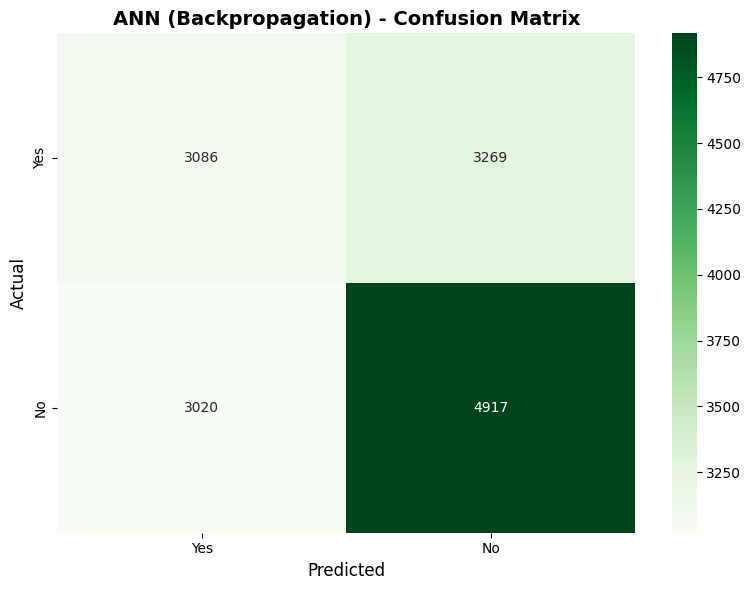

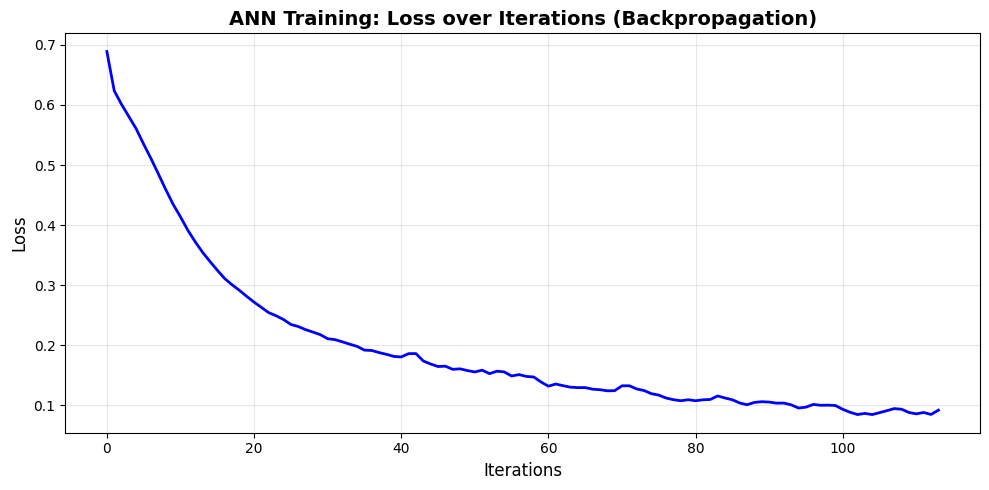

In [28]:
# Step 6: Visualizations
# 6a. Confusion Matrix
plt.figure(figsize=(8, 6))
# Use already flipped matrix (cm_ann) from above
sns.heatmap(cm_ann, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])
plt.title('ANN (Backpropagation) - Confusion Matrix', fontsize=14, weight='bold')
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.show()

# 6b. Training Loss Curve
plt.figure(figsize=(10, 5))
plt.plot(ann_model.loss_curve_, linewidth=2, color='blue')
plt.title('ANN Training: Loss over Iterations (Backpropagation)', fontsize=14, weight='bold')
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


---
## 5. Unsupervised Learning - Clustering Analysis

### 5.1 K-Means Clustering (Patient Segmentation)

 K-MEANS CLUSTERING - Patient Segmentation

 Finding optimal number of clusters...


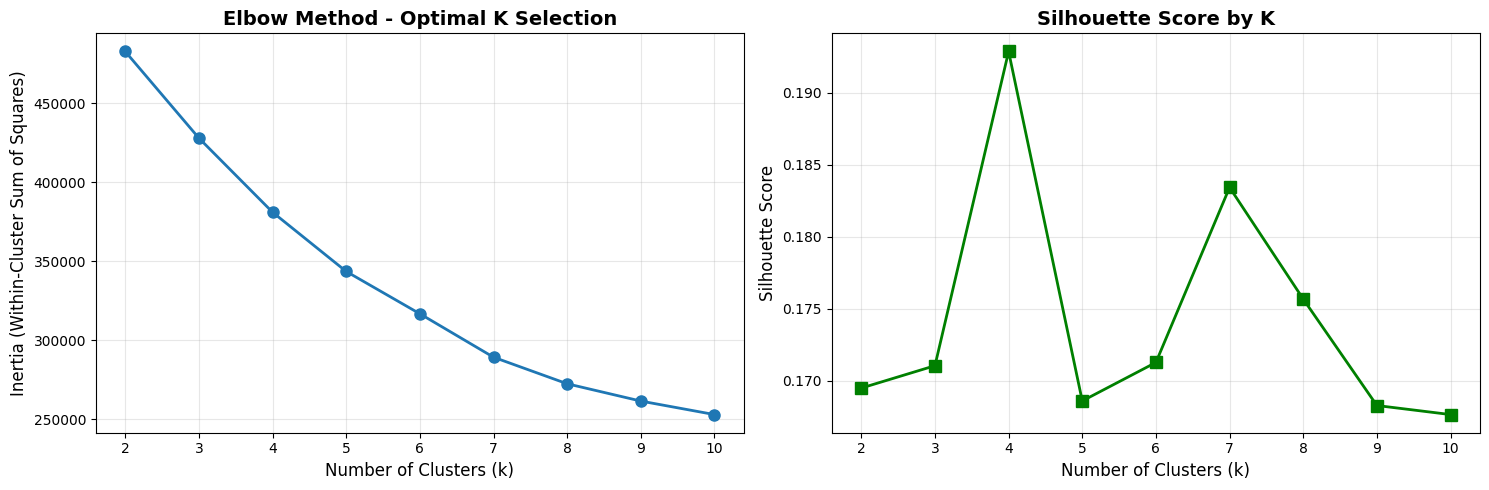


 Selected K = 3 clusters (Patient Risk Levels)

 Silhouette Score: 0.1711
  (Higher is better, range: -1 to 1)

 CLUSTER ANALYSIS

 Cluster 0 (n=25877 patients):
  Avg time in hospital:  5.86 days
  Avg medications:       19.68
  Avg diagnoses:         8.31
  Readmission rate:      46.81%

 Cluster 1 (n=36551 patients):
  Avg time in hospital:  2.65 days
  Avg medications:       11.21
  Avg diagnoses:         6.71
  Readmission rate:      38.80%

 Cluster 2 (n=9029 patients):
  Avg time in hospital:  3.77 days
  Avg medications:       15.54
  Avg diagnoses:         8.07
  Readmission rate:      59.46%


In [29]:
#  K-MEANS CLUSTERING (Unsupervised Learning)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

print("="*80)
print(" K-MEANS CLUSTERING - Patient Segmentation")
print("="*80)

# Step 1: Select NUMERICAL features only for clustering
numerical_features = [
    'time_in_hospital', 'num_lab_procedures', 'num_procedures',
    'num_medications', 'number_outpatient', 'number_emergency',
    'number_inpatient', 'number_diagnoses'
]

X_cluster = df[numerical_features]

# Step 2: Scale the features (important for K-Means)
scaler_kmeans = StandardScaler()
X_cluster_scaled = scaler_kmeans.fit_transform(X_cluster)

# Step 3: Determine optimal number of clusters using Elbow Method
print("\n Finding optimal number of clusters...")
inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_temp.fit(X_cluster_scaled)
    inertias.append(kmeans_temp.inertia_)
    silhouette_scores.append(silhouette_score(X_cluster_scaled, kmeans_temp.labels_))

# Plot Elbow Curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(K_range, inertias, marker='o', linewidth=2, markersize=8)
ax1.set_xlabel('Number of Clusters (k)', fontsize=12)
ax1.set_ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=12)
ax1.set_title('Elbow Method - Optimal K Selection', fontsize=14, weight='bold')
ax1.grid(True, alpha=0.3)

ax2.plot(K_range, silhouette_scores, marker='s', linewidth=2, markersize=8, color='green')
ax2.set_xlabel('Number of Clusters (k)', fontsize=12)
ax2.set_ylabel('Silhouette Score', fontsize=12)
ax2.set_title('Silhouette Score by K', fontsize=14, weight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Step 4: Choose optimal K (typically 3 or 4 for patient risk levels)
optimal_k = 3  # Low-risk, Medium-risk, High-risk
print(f"\n Selected K = {optimal_k} clusters (Patient Risk Levels)")

# Step 5: Fit K-Means with optimal K
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_cluster_scaled)

# Add cluster labels to dataframe
df['cluster'] = cluster_labels

# Step 6: Evaluate clustering quality
silhouette_avg = silhouette_score(X_cluster_scaled, cluster_labels)
print(f"\n Silhouette Score: {silhouette_avg:.4f}")
print("  (Higher is better, range: -1 to 1)")

# Step 7: Analyze clusters
print("\n"+"="*80)
print(" CLUSTER ANALYSIS")
print("="*80)

for i in range(optimal_k):
    cluster_data = df[df['cluster'] == i]
    print(f"\n Cluster {i} (n={len(cluster_data)} patients):")
    print(f"  Avg time in hospital:  {cluster_data['time_in_hospital'].mean():.2f} days")
    print(f"  Avg medications:       {cluster_data['num_medications'].mean():.2f}")
    print(f"  Avg diagnoses:         {cluster_data['number_diagnoses'].mean():.2f}")
    print(f"  Readmission rate:      {cluster_data['readmitted'].mean():.2%}")



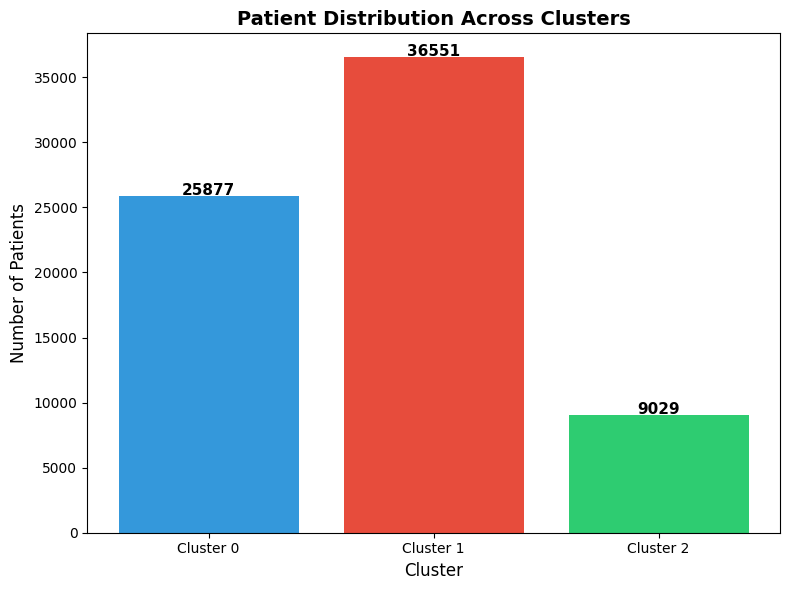

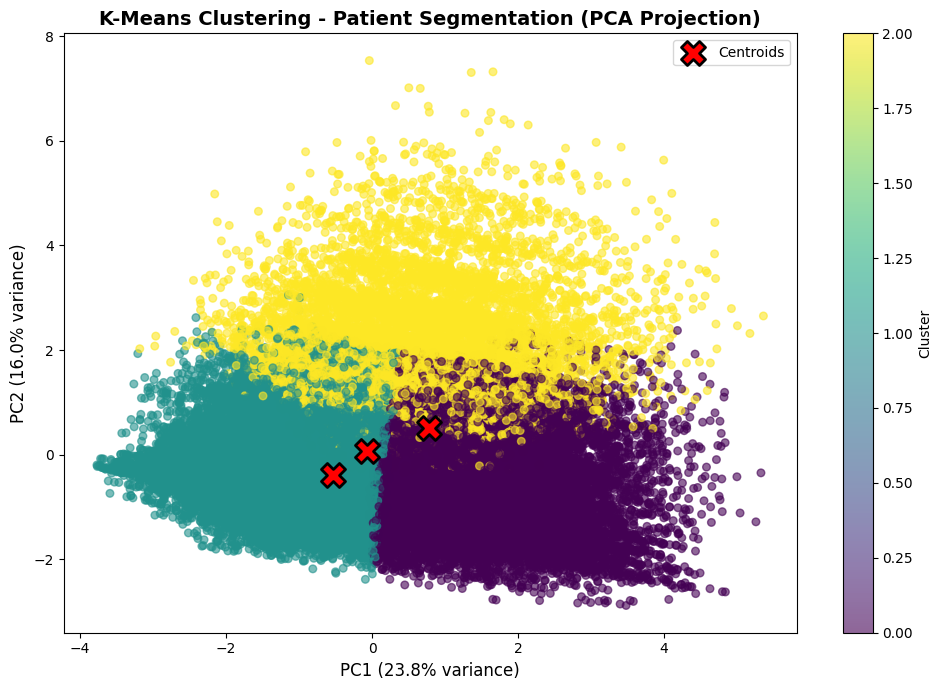

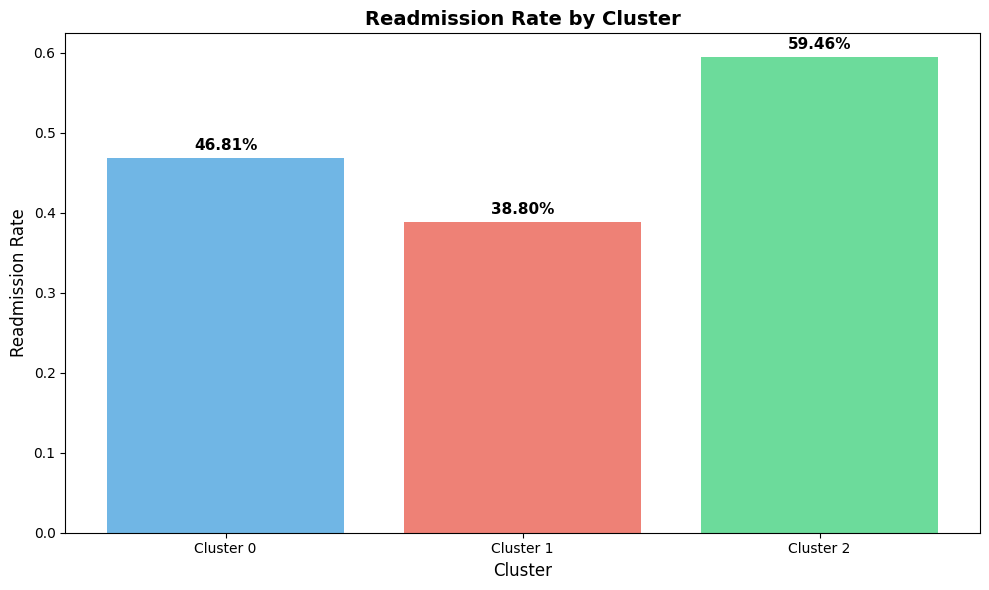


✅ K-Means clustering analysis complete!
   Patients segmented into 3 risk groups based on clinical features.


In [30]:
# Step 8: Visualizations

# 8a. Cluster Distribution
plt.figure(figsize=(8, 6))
cluster_counts = df['cluster'].value_counts().sort_index()
plt.bar(cluster_counts.index, cluster_counts.values, color=['#3498db', '#e74c3c', '#2ecc71'][:optimal_k])
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.title('Patient Distribution Across Clusters', fontsize=14, weight='bold')
plt.xticks(range(optimal_k), [f'Cluster {i}' for i in range(optimal_k)])
for i, v in enumerate(cluster_counts.values):
    plt.text(i, v + 100, str(v), ha='center', fontsize=11, weight='bold')
plt.tight_layout()
plt.show()

# 8b. 2D Cluster Visualization (using first 2 principal components)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster_scaled)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, 
                     cmap='viridis', alpha=0.6, s=30)
plt.scatter(kmeans_final.cluster_centers_[:, 0], kmeans_final.cluster_centers_[:, 1],
           marker='X', s=300, c='red', edgecolors='black', linewidths=2, label='Centroids')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)', fontsize=12)
plt.title('K-Means Clustering - Patient Segmentation (PCA Projection)', fontsize=14, weight='bold')
plt.colorbar(scatter, label='Cluster')
plt.legend()
plt.tight_layout()
plt.show()

# 8c. Readmission by Cluster
plt.figure(figsize=(10, 6))
readmit_by_cluster = df.groupby('cluster')['readmitted'].mean().sort_index()
plt.bar(readmit_by_cluster.index, readmit_by_cluster.values, 
        color=['#3498db', '#e74c3c', '#2ecc71'][:optimal_k], alpha=0.7)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Readmission Rate', fontsize=12)
plt.title('Readmission Rate by Cluster', fontsize=14, weight='bold')
plt.xticks(range(optimal_k), [f'Cluster {i}' for i in range(optimal_k)])
for i, v in enumerate(readmit_by_cluster.values):
    plt.text(i, v + 0.01, f'{v:.2%}', ha='center', fontsize=11, weight='bold')
plt.tight_layout()
plt.show()

print("\n✅ K-Means clustering analysis complete!")
print(f"   Patients segmented into {optimal_k} risk groups based on clinical features.")

---
## 6. Model Comparison & Performance Analysis

### 6.1 Comprehensive Performance Comparison

In [31]:

#  CLASSIFICATION MODELS COMPARISON
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

print("="*90)
print(" COMPREHENSIVE MODEL PERFORMANCE COMPARISON")
print("="*90)


# Step 1: Calculate Performance Metrics for All Models


models_performance = {
    'Model': ['Decision Tree', 'Naive Bayes', 'ANN (Backpropagation)'],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'ROC-AUC': []
}

# Decision Tree metrics
models_performance['Accuracy'].append(accuracy_score(y_test, y_pred))
models_performance['Precision'].append(precision_score(y_test, y_pred, average='weighted'))
models_performance['Recall'].append(recall_score(y_test, y_pred, average='weighted'))
models_performance['F1-Score'].append(f1_score(y_test, y_pred, average='weighted'))
models_performance['ROC-AUC'].append(roc_auc_score(y_test, y_pred))

# Naive Bayes metrics
models_performance['Accuracy'].append(accuracy_score(y_test, y_pred_nb))
models_performance['Precision'].append(precision_score(y_test, y_pred_nb, average='weighted'))
models_performance['Recall'].append(recall_score(y_test, y_pred_nb, average='weighted'))
models_performance['F1-Score'].append(f1_score(y_test, y_pred_nb, average='weighted'))
models_performance['ROC-AUC'].append(roc_auc_score(y_test, y_pred_nb))

# ANN metrics (using y_test_ann since ANN has different test split)
models_performance['Accuracy'].append(accuracy_score(y_test_ann, y_pred_ann))
models_performance['Precision'].append(precision_score(y_test_ann, y_pred_ann, average='weighted'))
models_performance['Recall'].append(recall_score(y_test_ann, y_pred_ann, average='weighted'))
models_performance['F1-Score'].append(f1_score(y_test_ann, y_pred_ann, average='weighted'))
models_performance['ROC-AUC'].append(roc_auc_score(y_test_ann, y_pred_ann))

# Create comparison DataFrame
comparison_df = pd.DataFrame(models_performance)

print("\n📊 PERFORMANCE METRICS TABLE:")
print("="*90)
print(comparison_df.to_string(index=False))
print("="*90)


# Step 2: Identify Best Model

best_accuracy_idx = comparison_df['Accuracy'].idxmax()
best_model = comparison_df.loc[best_accuracy_idx, 'Model']
best_accuracy = comparison_df.loc[best_accuracy_idx, 'Accuracy']

print(f"\n🏆 BEST PERFORMING MODEL: {best_model}")
print(f"   Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")
print("="*90)


# Step 3: Calculate ROC Data for Visualizations


# Get prediction probabilities for ROC curves
y_pred_dt_proba = model.predict_proba(X_test)[:, 1]
y_pred_nb_proba = nb_model.predict_proba(X_test)[:, 1]
y_pred_ann_proba = ann_model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curves
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt_proba)
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_nb_proba)
fpr_ann, tpr_ann, _ = roc_curve(y_test_ann, y_pred_ann_proba)  # Use y_test_ann for ANN

# Calculate AUC scores
auc_dt = auc(fpr_dt, tpr_dt)
auc_nb = auc(fpr_nb, tpr_nb)
auc_ann = auc(fpr_ann, tpr_ann)






 COMPREHENSIVE MODEL PERFORMANCE COMPARISON

📊 PERFORMANCE METRICS TABLE:
                Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
        Decision Tree  0.611321   0.606806 0.611321  0.604051 0.596455
          Naive Bayes  0.596488   0.598976 0.596488  0.555324 0.563701
ANN (Backpropagation)  0.559964   0.558304 0.559964  0.558965 0.552553

🏆 BEST PERFORMING MODEL: Decision Tree
   Accuracy: 0.6113 (61.13%)



 COMPREHENSIVE VISUALIZATIONS



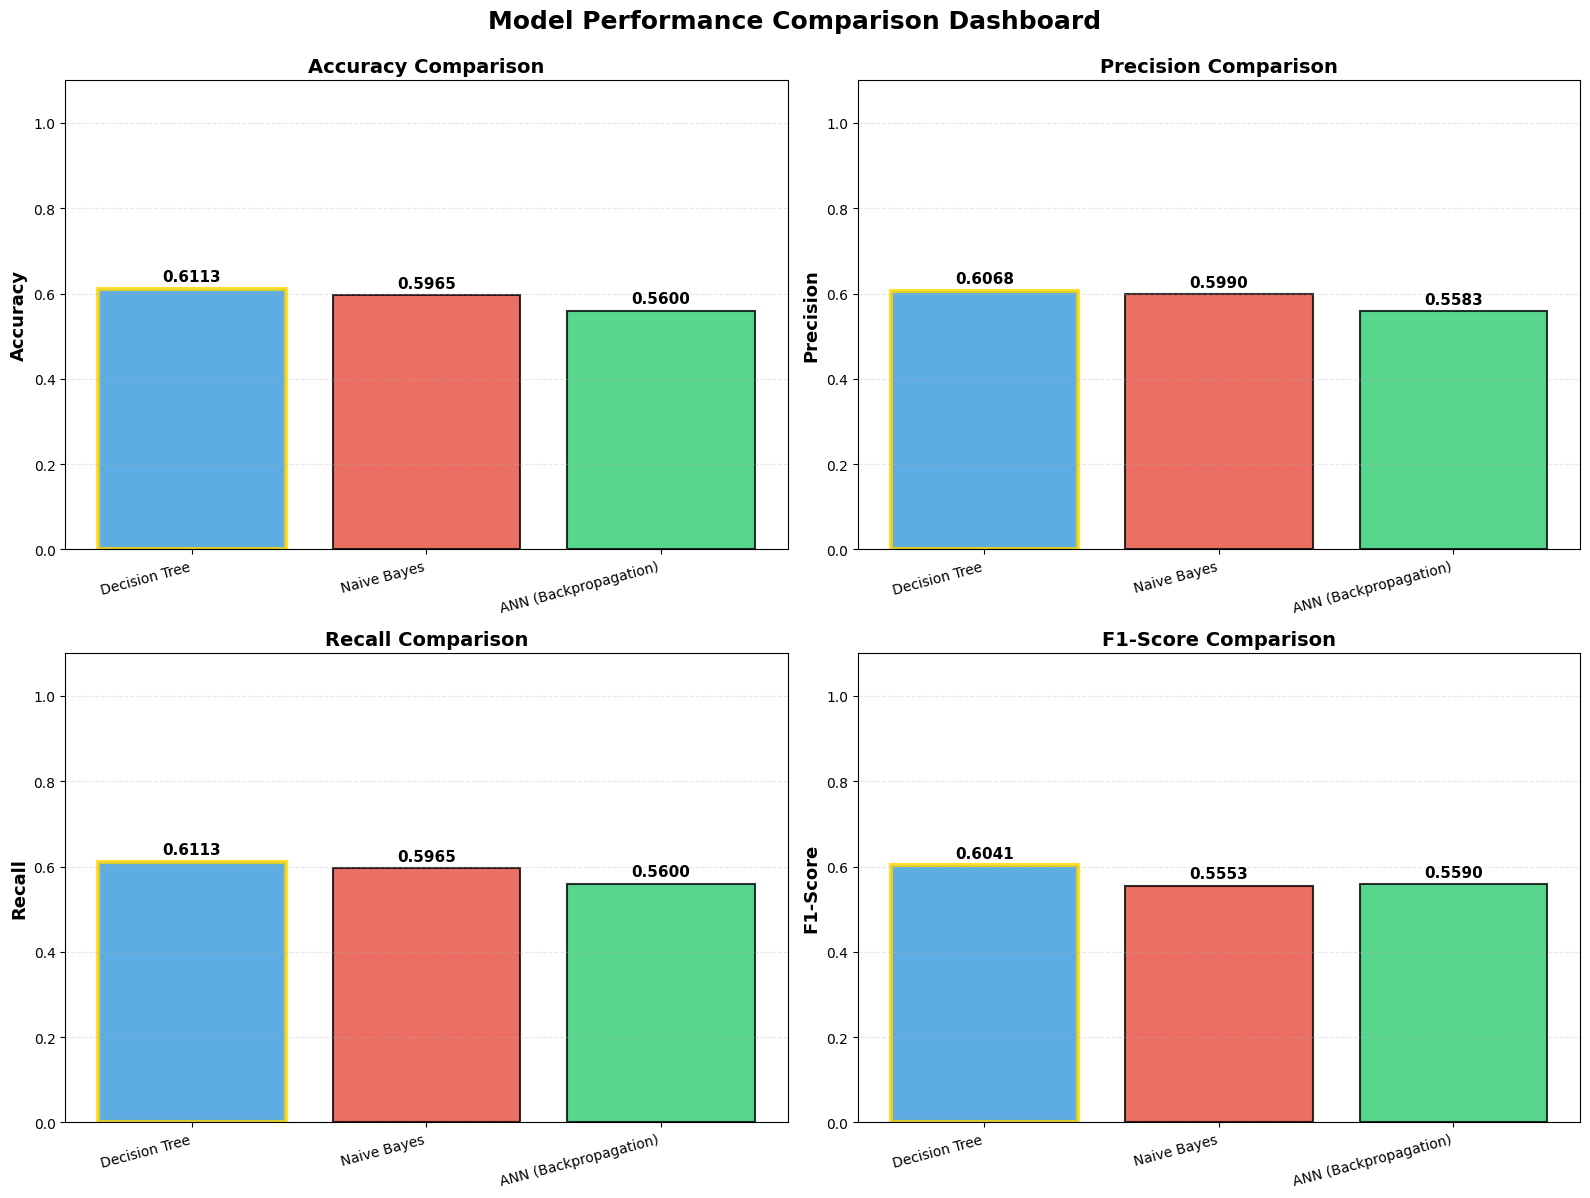

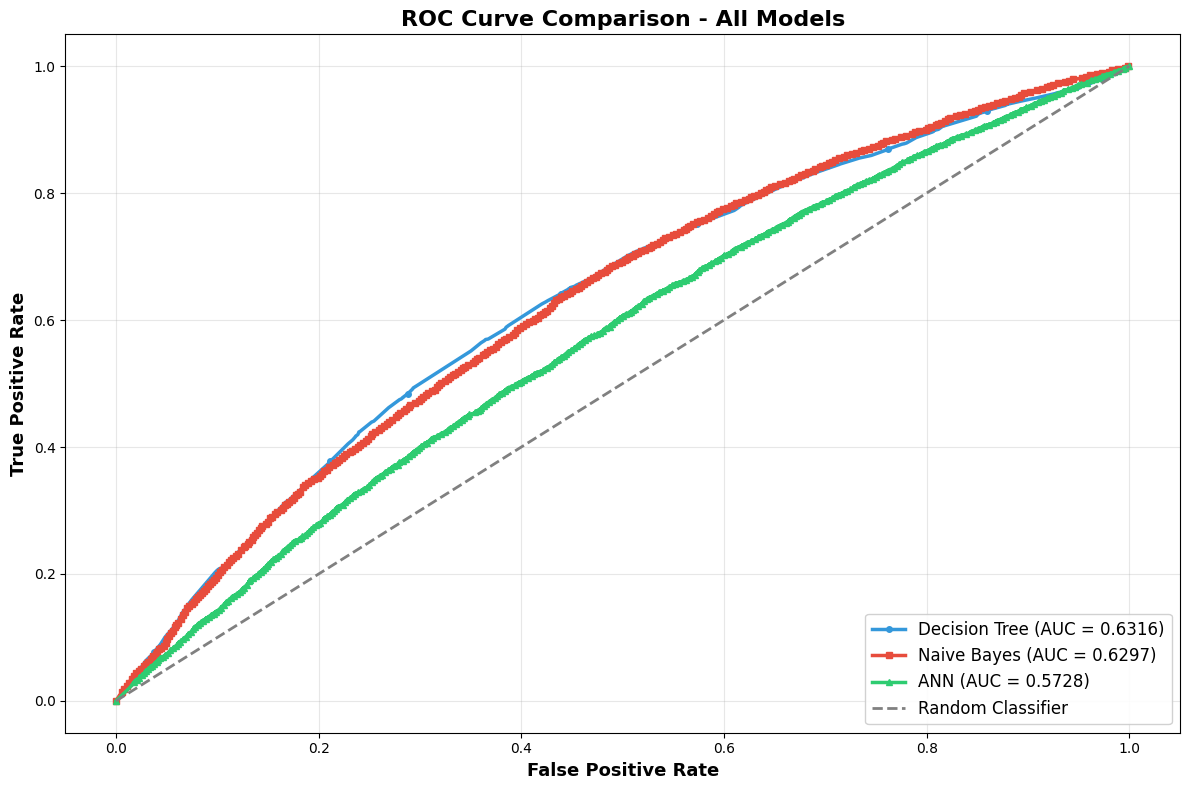

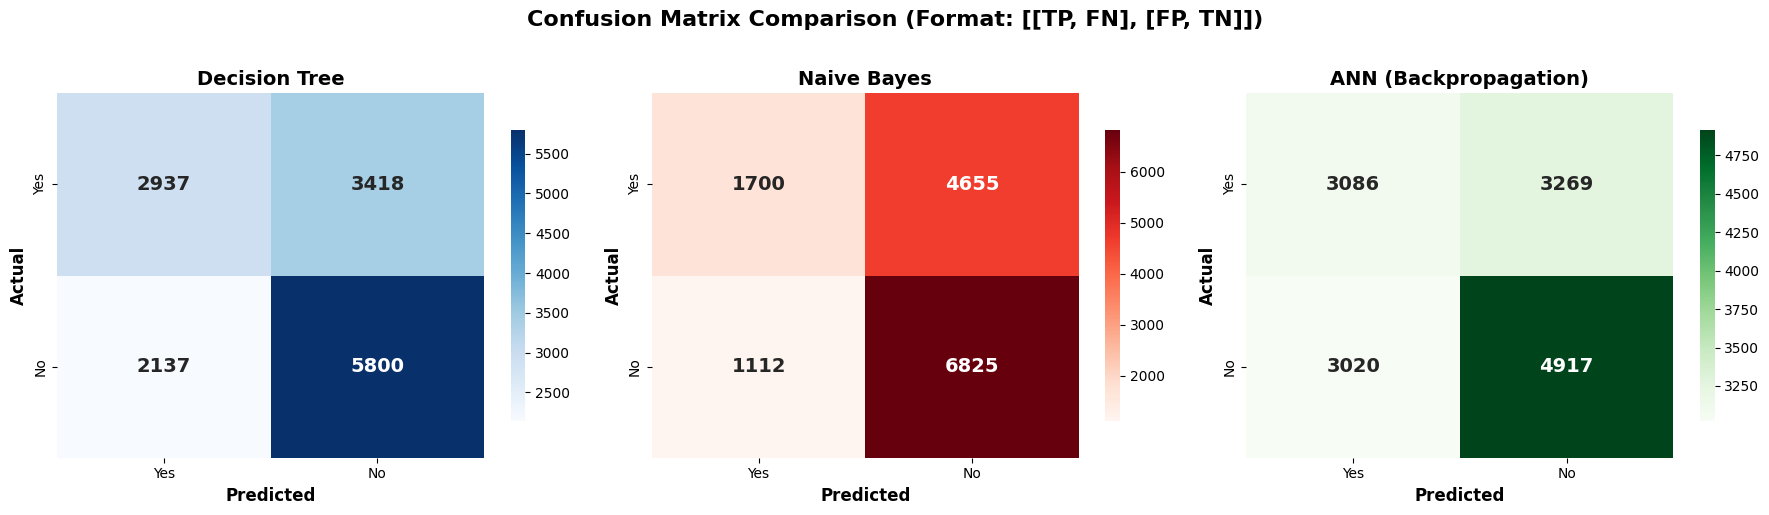

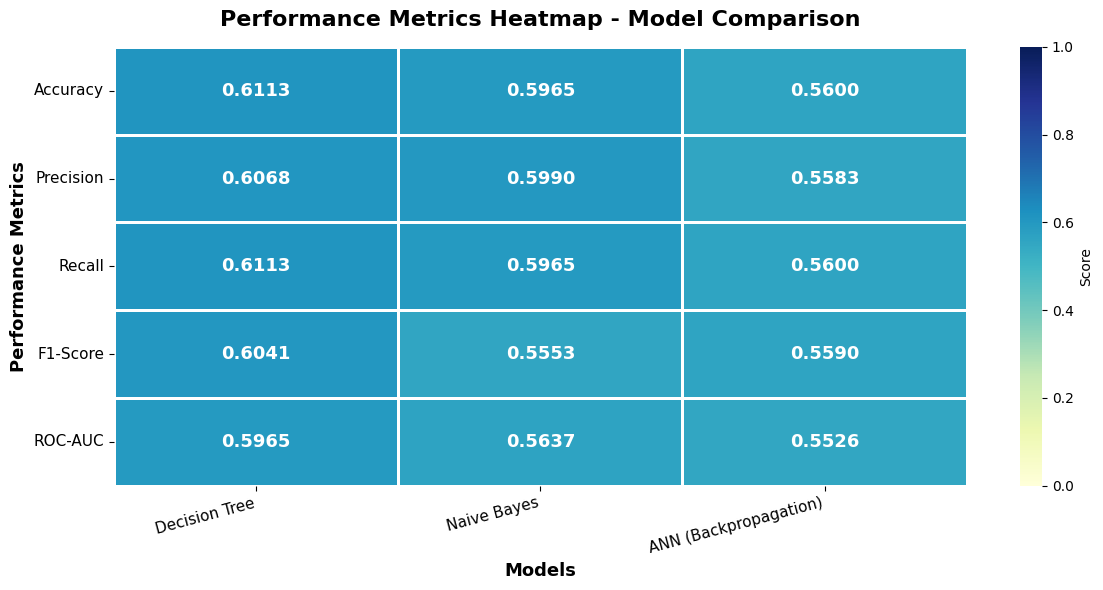

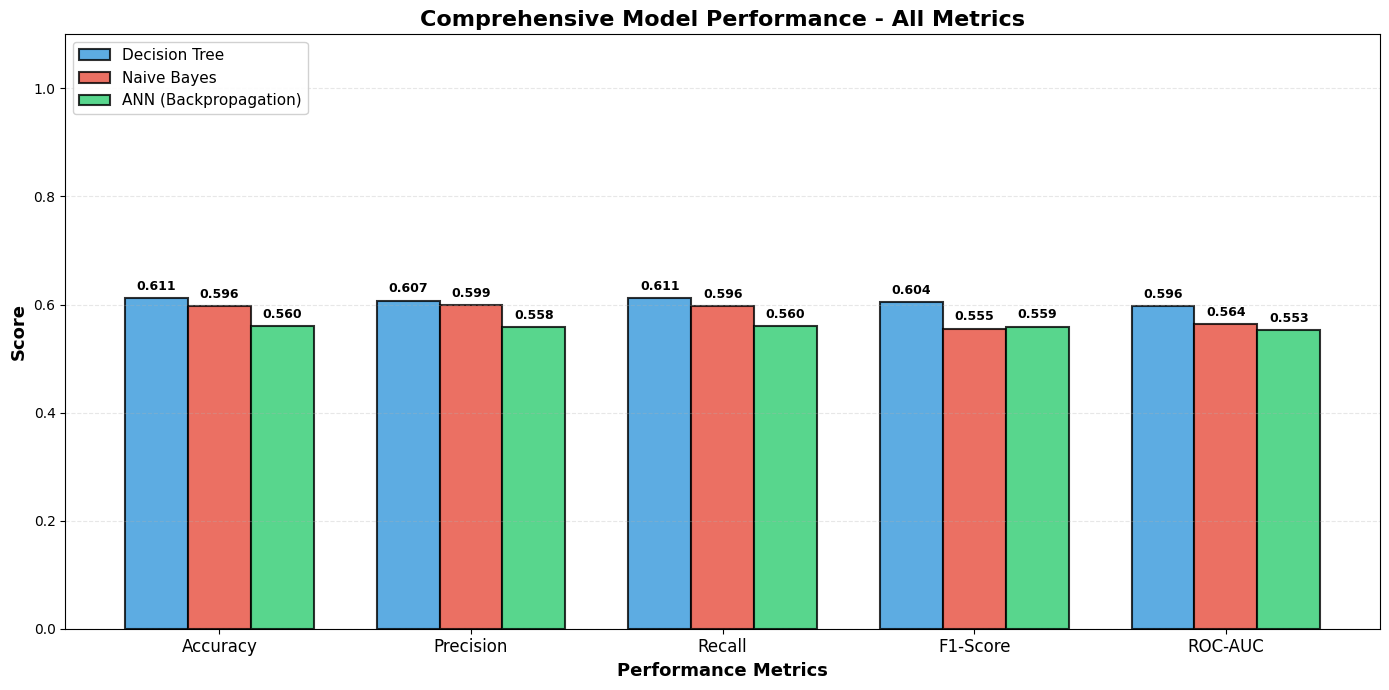

In [33]:

#  MODEL COMPARISON - VISUALIZATIONS


print("\n" + "="*90)
print(" COMPREHENSIVE VISUALIZATIONS")
print("="*90 + "\n")


# Visualization 1: Performance Metrics Dashboard (4-Panel)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Model Performance Comparison Dashboard', fontsize=18, weight='bold', y=0.995)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['#3498db', '#e74c3c', '#2ecc71']

for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    bars = ax.bar(comparison_df['Model'], comparison_df[metric], color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
    
    # Add value labels on bars
    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.4f}',
                ha='center', va='bottom', fontsize=11, weight='bold')
    
    ax.set_ylabel(metric, fontsize=13, weight='bold')
    ax.set_ylim([0, 1.1])
    ax.set_title(f'{metric} Comparison', fontsize=14, weight='bold')
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    ax.set_xticklabels(comparison_df['Model'], rotation=15, ha='right')
    
    # Highlight best performer
    best_idx = comparison_df[metric].idxmax()
    bars[best_idx].set_edgecolor('gold')
    bars[best_idx].set_linewidth(3)

plt.tight_layout()
plt.show()


# Visualization 2: ROC Curves Comparison

plt.figure(figsize=(12, 8))

# Plot ROC curves using pre-calculated data
plt.plot(fpr_dt, tpr_dt, color='#3498db', linewidth=2.5, 
         label=f'Decision Tree (AUC = {auc_dt:.4f})', marker='o', markersize=4, markevery=20)
plt.plot(fpr_nb, tpr_nb, color='#e74c3c', linewidth=2.5, 
         label=f'Naive Bayes (AUC = {auc_nb:.4f})', marker='s', markersize=4, markevery=20)
plt.plot(fpr_ann, tpr_ann, color='#2ecc71', linewidth=2.5, 
         label=f'ANN (AUC = {auc_ann:.4f})', marker='^', markersize=4, markevery=20)

# Plot diagonal reference line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=2, label='Random Classifier')

plt.xlabel('False Positive Rate', fontsize=13, weight='bold')
plt.ylabel('True Positive Rate', fontsize=13, weight='bold')
plt.title('ROC Curve Comparison - All Models', fontsize=16, weight='bold')
plt.legend(loc='lower right', fontsize=12, framealpha=0.9)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# Visualization 3: Confusion Matrices Side-by-Side

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Confusion Matrix Comparison (Format: [[TP, FN], [FP, TN]])', 
             fontsize=16, weight='bold', y=1.02)

# Decision Tree
cm_dt_display = cm_dt_flipped
sns.heatmap(cm_dt_display, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'], 
            cbar_kws={'shrink': 0.8}, annot_kws={'size': 14, 'weight': 'bold'})
axes[0].set_title('Decision Tree', fontsize=14, weight='bold')
axes[0].set_ylabel('Actual', fontsize=12, weight='bold')
axes[0].set_xlabel('Predicted', fontsize=12, weight='bold')

# Naive Bayes
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Reds', ax=axes[1],
            xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'],
            cbar_kws={'shrink': 0.8}, annot_kws={'size': 14, 'weight': 'bold'})
axes[1].set_title('Naive Bayes', fontsize=14, weight='bold')
axes[1].set_ylabel('Actual', fontsize=12, weight='bold')
axes[1].set_xlabel('Predicted', fontsize=12, weight='bold')

# ANN
sns.heatmap(cm_ann, annot=True, fmt='d', cmap='Greens', ax=axes[2],
            xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'],
            cbar_kws={'shrink': 0.8}, annot_kws={'size': 14, 'weight': 'bold'})
axes[2].set_title('ANN (Backpropagation)', fontsize=14, weight='bold')
axes[2].set_ylabel('Actual', fontsize=12, weight='bold')
axes[2].set_xlabel('Predicted', fontsize=12, weight='bold')

plt.tight_layout()
plt.show()


# Visualization 4: Performance Heatmap

fig, ax = plt.subplots(figsize=(12, 6))

# Prepare data for heatmap (transpose for better view)
heatmap_data = comparison_df.set_index('Model').T

# Create heatmap with annotations
sns.heatmap(heatmap_data, annot=True, fmt='.4f', cmap='YlGnBu', 
            linewidths=2, linecolor='white', cbar_kws={'label': 'Score'},
            annot_kws={'size': 13, 'weight': 'bold'}, vmin=0, vmax=1, ax=ax)

# Customize plot
ax.set_title('Performance Metrics Heatmap - Model Comparison', 
             fontsize=16, weight='bold', pad=15)
ax.set_xlabel('Models', fontsize=13, weight='bold')
ax.set_ylabel('Performance Metrics', fontsize=13, weight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=15, ha='right', fontsize=11)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=11)

# Add a border around the plot
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(2)

plt.tight_layout()
plt.show()


# Visualization 5: Grouped Bar Chart (All Metrics Together)

fig, ax = plt.subplots(figsize=(14, 7))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
x = np.arange(len(metrics))
width = 0.25

# Plot bars for each model
for i, model_name in enumerate(comparison_df['Model']):
    values = comparison_df.iloc[i, 1:].values
    offset = (i - 1) * width
    bars = ax.bar(x + offset, values, width, label=model_name, 
                   color=colors[i], alpha=0.8, edgecolor='black', linewidth=1.5)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9, weight='bold')

ax.set_xlabel('Performance Metrics', fontsize=13, weight='bold')
ax.set_ylabel('Score', fontsize=13, weight='bold')
ax.set_title('Comprehensive Model Performance - All Metrics', fontsize=16, weight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=12)
ax.legend(loc='upper left', fontsize=11, framealpha=0.9)
ax.set_ylim([0, 1.1])
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

